In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import librosa
import soundfile
import os, glob, pickle
import numpy as np
import matplotlib.pyplot as mt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import joblib

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

#import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
data,sample_rate = librosa.load('audio_speech_actors_01-24/Actor_02/03-01-02-01-02-01-02.wav')
np.abs(librosa.stft(data))

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 2.0581091e-04,
        2.8682762e-04, 9.7262593e-05],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 5.0202332e-04,
        4.8846158e-04, 3.5425482e-04],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 4.1796488e-04,
        6.2281493e-04, 7.3409418e-04],
       ...,
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 3.2931752e-07,
        1.8773579e-06, 5.9676840e-06],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 6.4179721e-07,
        1.7928779e-06, 6.2650470e-06],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 4.2631527e-07,
        2.9290056e-06, 6.7245428e-06]], dtype=float32)

In [3]:
# Extract features 
def extract_feature(file_name, mfcc, chroma, mel):
#     file_name = '/kaggle/input/ravdess-emotional-speech-audio/Actor_02/03-01-07-01-02-02-02.wav'
    data,sample_rate = librosa.load(file_name)
    result=np.array([])
    if mfcc:
            mfccs=np.mean(librosa.feature.mfcc(y=data, sr=sample_rate, n_mfcc=40).T, axis=0)
            result=np.hstack((result, mfccs))
    if chroma:
            stft=np.abs(librosa.stft(data))
            chroma=np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
            result=np.hstack((result, chroma))
    if mel:
        mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
        result=np.hstack((result, mel))
    return result

In [4]:
emotions={
  '01':'neutral',
  '02':'calm',
  '03':'happy',
  '04':'sad',
  '05':'angry',
  '06':'fearful',
  '07':'disgust',
  '08':'surprised'
}

#gender classification into male and female
def gender(g):
    if int(g[0:2]) % 2 == 0:
        return 'female'
    else:
        return 'male'

In [5]:
# extract features for each sound file

from tqdm import tqdm

    



In [6]:
# Split the dataset


x,y=[],[]
n=0

for dirname, zzz, filenames in os.walk('audio_speech_actors_01-24'):

    if(filenames!=".DS_Store"):
        
        for filename in filenames:
                
                file_name=os.path.basename(filename)
                n=n+1
                print(n)
                if(file_name!=".DS_Store"):
                    
                    emotion=emotions[file_name.split("-")[2]] + '_' + gender(file_name.split("-")[-1])
                    print(emotion)
                    file = os.path.join(dirname, filename)
                    feature=extract_feature(file, mfcc=True, chroma=True, mel=True )
                    x.append(feature)
                    y.append(emotion)
x_train,x_test,y_train,y_test=train_test_split(np.array(x), y, test_size=0.2, random_state=1)






1
2
angry_female
3
fearful_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -8.1456150e-05
 -3.5299374e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -3.7505772e-06
  7.7417353e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


4
fearful_female
5
angry_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 3.0036153e-05  2.7443759e-05  9.8903274e-07 ... -1.1224319e-05
 -1.7981063e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  1.0203025e-05
 -1.3484111e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


6
disgust_female
7
sad_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -6.2484395e-07
  1.4322423e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 6.8676131e-09 4.9077755e-09
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


8
sad_female
9
disgust_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-2.9270122e-06  4.7373724e-06  1.0459749e-05 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -2.9567454e-05
  2.6943101e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


10
surprised_female
11
surprised_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 7.4474977e-09 -3.6920069e-09 -1.7694524e-09 ...  1.7177777e-09
 -1.3001107e-09  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -2.9869720e-06
  6.6106177e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


12
happy_female
13
happy_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  1.0480491e-08
 -1.0120676e-08  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-1.3165257e-05 -8.9564452e-07  9.1949454e-07 ... -8.0967846e-09
  5.4641260e-09  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


14
calm_female
15
neutral_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[0.000000e+00 0.000000e+00 0.000000e+00 ... 1.781282e-05 5.191766e-06
 0.000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -3.4905647e-06
 -4.4564182e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


16
calm_female
17
happy_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  6.6608516e-07
 -3.1252762e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 6.7752620e-07 1.0969114e-05
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


18
happy_female
19
calm_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 1.5614663e-05  1.3804451e-05 -1.9015915e-06 ...  3.8857532e-08
 -3.7665945e-08  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -1.0146568e-06
  8.8210953e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


20
calm_female
21
neutral_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -1.3965004e-07
  1.3745296e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  3.8535234e-07
 -2.9829107e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


22
fearful_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 1.1812286e-05  2.7926912e-06 -4.6966820e-06 ...  1.2253681e-05
  4.0724932e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


23
angry_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 3.7439131e-05  8.3553168e-06 -3.0173719e-06 ... -2.5724016e-06
  1.2112387e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -3.3238364e-05
 -1.4833636e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


24
angry_female
25
fearful_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -2.1701185e-06
  2.6182327e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  4.6312916e-08
 -2.7663509e-08  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


26
sad_female
27
disgust_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[0.000000e+00 0.000000e+00 0.000000e+00 ... 5.910415e-05 4.711750e-05
 0.000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00050845 -0.00058109
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


28
disgust_female
29
sad_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -3.8617331e-06
  2.2478548e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -5.2214882e-10
  3.2479552e-10  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


30
surprised_female
31
surprised_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -1.8386938e-06
 -7.6317529e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -2.1566341e-06
  1.6662759e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


32
calm_female
33
neutral_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 4.9656126e-05 5.8946156e-05
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 2.4383530e-08 -2.5146955e-08  2.4673925e-08 ...  1.0081484e-05
 -2.4581104e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


34
calm_female
35
happy_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.9418863e-05 3.0466281e-05
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 1.4861443e-07 -1.6280487e-07  1.7306931e-07 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


36
happy_female
37
disgust_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -1.1003667e-05
  5.3526005e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-6.1248056e-06 -4.8266851e-05 -9.6139804e-05 ...  6.9340743e-08
 -6.8798990e-08  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


38
sad_female
39
sad_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.000000e+00  0.000000e+00  0.000000e+00 ... -9.032854e-07  7.402616e-07
  0.000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.000000e+00  0.000000e+00  0.000000e+00 ... -5.244597e-07  3.087021e-07
  0.000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


40
disgust_female
41
angry_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  3.8595292e-07
 -5.8347052e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -5.1763468e-06
 -2.0219426e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


42
fearful_female
43
fearful_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-1.9929753e-06 -1.3049745e-05  1.6122704e-07 ... -1.9122794e-05
  7.3381743e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 2.0566058e-05 1.3981737e-05
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


44
angry_female
45
surprised_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  2.0793420e-06
 -1.5932054e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  3.6843480e-07
 -3.8839426e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


46
surprised_female
47
sad_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  7.8675448e-09
 -1.1229446e-08  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.000000e+00  0.000000e+00  0.000000e+00 ... -6.244267e-05 -5.080612e-05
  0.000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


48
disgust_female
49
disgust_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  8.0032023e-06
 -4.3980657e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  7.9907545e-07
 -6.1902301e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


50
sad_female
51
fearful_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  6.4146366e-06
 -4.1399267e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  1.4936194e-05
 -2.8932388e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


52
angry_female
53
angry_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -4.0300896e-09
  1.0359929e-08  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[0. 0. 0. ... 0. 0. 0.] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


54
fearful_female
55
surprised_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  1.1413482e-05
 -3.1332556e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -5.5611554e-06
  3.3549663e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


56
surprised_female
57
neutral_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  7.6991374e-10
 -5.6173849e-10  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -2.3783776e-05
  2.6043908e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


58
calm_female
59
calm_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  9.4318398e-07
 -1.2913623e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  2.1529368e-06
 -9.1583189e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


60
happy_female
61
happy_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-1.2782263e-05 -1.0258184e-06  6.1477124e-07 ... -5.2009753e-05
 -2.5108304e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-4.2046711e-05 -6.8732683e-05 -5.3474985e-05 ...  4.5169782e-04
  4.7340980e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


62
neutral_male
63
calm_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[3.9426297e-05 8.0595702e-05 7.5862685e-05 ... 3.9914969e-05 7.0437483e-05
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


64
calm_male
65
happy_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 1.5182918e-05  1.3956031e-05  2.5323312e-05 ... -3.6435686e-05
 -4.4226752e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[8.7551874e-05 1.3283629e-04 8.7496075e-05 ... 1.7464753e-04 2.0036273e-04
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


66
happy_male
67
sad_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-1.6482957e-07  1.4285199e-07 -1.0765291e-07 ... -5.5778634e-07
  3.6827026e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-7.4775933e-05 -1.0801280e-04 -1.0975967e-04 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


68
disgust_male
69
disgust_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 5.6800284e-09 -6.6714296e-09  7.5467339e-09 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 1.1327367e-06 -1.5105284e-06 -2.3219089e-05 ...  1.0550528e-07
 -7.4576548e-08  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


70
sad_male
71
fearful_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-1.0001330e-04 -1.2882640e-04 -2.2261847e-05 ...  9.3211347e-05
  6.7173110e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-3.0139559e-05 -5.0483173e-05 -6.0976883e-05 ...  2.8986033e-05
  5.4038141e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


72
angry_male
73
angry_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-1.0398557e-04 -1.4350057e-04 -1.5373167e-04 ...  6.5988126e-05
  1.1213522e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 7.8598703e-07 -7.0515603e-07  1.2678165e-06 ...  2.4839026e-05
  3.6159632e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


74
fearful_male
75
surprised_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-2.5758736e-05 -2.0743963e-05  8.9895576e-07 ...  3.1962606e-09
 -2.4966620e-09  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[1.0017778e-04 1.3643615e-04 1.2013205e-04 ... 7.6313161e-05 6.6601140e-05
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


76
surprised_male
77
disgust_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 5.8336009e-05  8.1488608e-05  4.6898676e-05 ... -7.9365755e-03
 -8.7798024e-03  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-2.66710140e-05 -4.16440380e-05 -4.45589030e-05 ...  3.72471404e-05
  1.05738545e-05  0.00000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


78
sad_male
79
sad_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 7.2697320e-10 -5.0790185e-09  1.0667764e-08 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[2.2134185e-05 3.3234930e-05 4.7668625e-05 ... 1.8715460e-05 3.1770625e-05
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


80
disgust_male
81
angry_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-3.6464658e-05 -1.7872269e-04 -2.5839725e-05 ... -8.2619699e-05
 -1.0652065e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[4.33938258e-05 8.92238313e-05 1.19951175e-04 ... 2.74926890e-04
 2.37816290e-04 0.00000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


82
fearful_male
83
fearful_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-2.5839058e-06  1.0881873e-05  5.8706987e-06 ... -6.1533872e-05
 -7.9256090e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 1.1121890e-05  5.2797468e-06  9.5963223e-06 ...  6.9089556e-06
 -1.6511116e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


84
angry_male
85
surprised_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 1.0141278e-04  1.2023348e-04 -8.0334194e-06 ... -6.9118047e-05
 -8.9678215e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.03332146e-04
 8.61147055e-05 0.00000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


86
surprised_male
87
calm_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-1.4436517e-05 -1.4870009e-05 -2.3355273e-05 ...  2.6691049e-07
 -2.5689209e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-5.2721674e-07  8.2976283e-07 -1.3403313e-06 ...  5.4800377e-05
  3.9269362e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


88
neutral_male
89
calm_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[3.2389056e-05 6.1519560e-05 7.2347597e-05 ... 3.8163675e-05 4.4549834e-05
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[2.3080393e-05 4.7841440e-05 1.8211405e-05 ... 4.7479738e-05 5.2140527e-05
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


90
happy_male
91
happy_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-5.2941868e-08  1.9009287e-08  2.6495190e-08 ...  1.0545691e-04
  1.0128235e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 1.8047605e-06  1.3419478e-05 -7.6088503e-07 ... -9.1590928e-06
 -2.1136040e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


92
fearful_male
93
angry_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-2.2350328e-05 -3.2666827e-05 -2.9328314e-05 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 6.4091199e-07 -9.7488169e-07  1.5218887e-06 ...  1.4865213e-05
  1.3710648e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


94
angry_male
95
fearful_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-7.0119683e-08 -4.0410461e-07  1.1636250e-06 ...  3.7429989e-05
 -1.5163779e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 9.8117351e-05  1.5482676e-04  1.1138364e-04 ... -6.4418986e-05
 -7.2761199e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


96
sad_male
97
disgust_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-1.3576662e-05 -8.1726149e-08 -5.6007013e-07 ...  4.1586030e-05
  4.2557280e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 1.9716546e-05  3.5858535e-05  2.5135058e-05 ... -9.1705306e-06
 -4.7287590e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


98
disgust_male
99
sad_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 9.3206090e-06  2.8868657e-05  2.5110739e-05 ... -9.9918128e-05
 -1.0209030e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 1.8695755e-05  4.4336794e-05  3.4898254e-05 ... -7.3663992e-05
 -8.2688435e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


100
surprised_male
101
surprised_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[4.38110037e-05 8.86311391e-05 6.79003715e-05 ... 1.38619935e-05
 1.84575074e-05 0.00000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 1.1645848e-05  3.1110776e-06 -4.3206674e-06 ...  9.7142605e-05
  8.6879816e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


102
happy_male
103
happy_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-6.3602798e-05 -8.6964530e-05 -7.8349643e-05 ... -3.8872684e-05
 -6.6795503e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.00012933  0.00020775  0.00019058 ... -0.00015524 -0.00017892
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


104
calm_male
105
calm_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-7.2781426e-05 -9.5268879e-05 -5.7156765e-05 ... -4.6052915e-05
 -5.7972360e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-1.2634681e-06  1.5004285e-06  2.3913404e-05 ...  5.4147935e-05
  3.7107817e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


106
neutral_male
107
happy_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 4.7297081e-07 -1.6766206e-05 -1.9333109e-05 ...  1.9730796e-04
  1.8830714e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-9.6169958e-07  8.7800163e-06  8.9592595e-06 ...  7.5486394e-05
  9.6124786e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


108
happy_male
109
calm_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-1.0066780e-04 -1.3208178e-04 -1.2528992e-04 ... -1.2642286e-05
 -8.4956073e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-2.0082047e-05 -3.6026857e-05 -4.2684351e-05 ...  9.8053779e-06
  9.3445078e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


110
neutral_male
111
calm_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 7.0949223e-05  1.2079003e-04  1.1247222e-04 ... -8.9192872e-05
 -9.3600349e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[4.0646595e-05 9.3142567e-05 7.9651749e-05 ... 2.9703808e-05 3.2711432e-05
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


112
angry_male
113
fearful_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 2.3211149e-07 -2.6495709e-07  2.9292690e-07 ...  1.5123580e-04
  1.3413306e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 4.21967252e-06  2.62287085e-05  2.77488944e-05 ... -1.21155055e-04
 -1.82467498e-04  0.00000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


114
fearful_male
115
angry_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-1.2462267e-08 -4.5879625e-09  2.6431058e-08 ... -2.6773202e-04
 -2.9766993e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-4.2923606e-05 -6.8247587e-05 -4.6757945e-05 ... -6.5111731e-06
 -9.5966270e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


116
disgust_male
117
sad_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-4.9272287e-05 -6.5111111e-05 -6.7035631e-05 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-5.9398020e-10  7.6544054e-10 -9.4802866e-10 ...  1.0393958e-05
  2.2375287e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


118
sad_male
119
disgust_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-2.0804957e-05 -1.9806397e-05 -2.1040063e-05 ... -1.2575579e-04
 -1.5036089e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-8.7252134e-05 -1.4830304e-04 -1.1135515e-04 ...  2.1486172e-05
  9.2967830e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


120
surprised_male
121
surprised_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[8.0680675e-06 3.4380602e-05 1.7415321e-05 ... 3.0341789e-05 3.1251206e-05
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-3.4753891e-09  4.7945723e-09 -6.3257968e-09 ...  5.9480652e-07
 -4.4528335e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


122
happy_female
123
happy_female
124
calm_female
125
calm_female
126
neutral_female
127
fearful_female
128
angry_female
129
angry_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00 -1.1271335e-12  2.5626274e-12 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 2.2149584e-09 -4.0039869e-09  6.2654477e-09 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


130
fearful_female
131
sad_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[1.9963752e-04 2.8329983e-04 6.5009612e-05 ... 1.6720769e-07 2.6078678e-07
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


132
disgust_female
133
disgust_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.000000e+00  0.000000e+00  0.000000e+00 ... -1.120615e-08  9.216074e-09
  0.000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 1.3945042e-07 -1.6381924e-07  1.8662318e-07 ... -6.8608536e-08
  5.3513180e-08  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


134
sad_female
135
surprised_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-4.3238927e-08  4.7927376e-08 -5.1209227e-08 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


136
surprised_female
137
angry_female
138
fearful_female
139
fearful_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 1.3736240e-10 -8.0509721e-10  1.7407468e-09 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -5.8528098e-09
  3.1047558e-09  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


140
angry_female
141
disgust_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 7.2793526e-08 -8.4489663e-08  9.5075265e-08 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


142
sad_female
143
sad_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 1.0109706e-07 -1.8458940e-07  2.8312431e-07 ...  6.5268534e-07
 -4.2243914e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


144
disgust_female
145
surprised_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-9.3756455e-07  1.2991613e-06 -1.8662927e-06 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-9.084159e-08  8.861279e-08 -8.140193e-08 ...  0.000000e+00  0.000000e+00
  0.000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


146
surprised_female
147
happy_female
148
happy_female
149
calm_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-8.8390209e-08  1.0181708e-07 -1.1384954e-07 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.000000e+00  0.000000e+00  0.000000e+00 ... -7.299605e-10  6.218946e-10
  0.000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


150
neutral_female
151
calm_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-1.4251865e-10  1.9504061e-10 -2.5405866e-10 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


152
sad_female
153
disgust_female
154
disgust_female
155
sad_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -1.8863416e-07
  2.0480346e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


156
fearful_female
157
angry_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  1.0143946e-06
 -2.6524373e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 4.1250021e-09 -7.0776458e-08  1.5547995e-07 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


158
angry_female
159
fearful_female
160
surprised_female
161
surprised_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-2.0594525e-10  3.9978099e-10 -6.7229472e-10 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


162
neutral_female
163
calm_female
164
calm_female
165
happy_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ... -1.60875686e-08
  1.16178835e-08  0.00000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


166
happy_female
167
calm_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  2.0225288e-08
 -8.7788887e-09  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  4.6953952e-09
 -3.3706307e-09  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


168
neutral_female
169
calm_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 4.7052872e-11 -6.9230288e-11  9.6121958e-11 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


170
happy_female
171
happy_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  1.3903466e-08
 -9.4329744e-09  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


172
disgust_female
173
sad_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-3.4601012e-06 -1.0929918e-05 -4.2856104e-06 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


174
sad_female
175
disgust_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 3.3738947e-06 -1.1625637e-05 -5.5755108e-06 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


176
angry_female
177
fearful_female
178
fearful_female
179
angry_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 5.7237703e-08 -5.2516956e-08  4.3339980e-08 ...  8.8525439e-07
 -4.4305048e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -4.2013664e-09
  7.2064541e-09  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


180
surprised_female
181
surprised_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  9.0463432e-09
 -3.2050327e-08  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  3.7188834e-09
 -2.7883951e-09  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


182
surprised_female
183
surprised_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 2.1742497e-05 3.6261412e-05
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-7.2573294e-09  1.0185370e-09  7.2207049e-09 ... -5.2665067e-03
  1.5266024e-02  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


184
sad_female
185
disgust_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00013735 -0.00011292
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -1.1751784e-05
  2.1786564e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


186
disgust_female
187
sad_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 2.6578507e-08 3.5703941e-08
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.00048751  0.00088961  0.00141771 ... -0.00174951 -0.00023268
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


188
fearful_female
189
angry_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.000000e+00  0.000000e+00  0.000000e+00 ... -6.050419e-05 -6.646725e-05
  0.000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  5.2837478e-08
 -5.1411675e-08  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


190
angry_female
191
fearful_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.000000e+00  0.000000e+00  0.000000e+00 ...  3.659832e-08 -8.975779e-08
  0.000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -2.0933726e-08
  1.8178115e-08  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


192
neutral_female
193
calm_female
194
calm_female
195
happy_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -7.2316911e-06
 -2.3386589e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


196
happy_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.1539454e-05 1.0546073e-06
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  3.0459174e-07
 -2.9241394e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


197
calm_female
198
neutral_female
199
calm_female
200
happy_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -5.0306458e-06
 -1.1801854e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -2.1065682e-06
 -1.1475674e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


201
happy_female
202
surprised_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -1.3147813e-05
 -3.0205479e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -5.2400964e-08
  4.5829427e-08  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


203
surprised_female
204
disgust_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  1.1993922e-06
 -9.6416159e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


205
sad_female
206
sad_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 6.7091383e-07 -7.3709845e-07  8.0237135e-07 ... -1.1808559e-07
  1.3164006e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


207
disgust_female
208
angry_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-9.510573e-06 -8.250108e-06  2.862567e-06 ...  3.487507e-05 -7.456424e-06
  0.000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-0.00032695 -0.00154974 -0.0002346  ...  0.00029088 -0.00093794
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


209
fearful_female
210
fearful_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.2903714e-05 2.0281150e-06
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


211
angry_female
212
happy_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  1.0931899e-06
 -1.0070768e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  1.8345385e-06
 -1.4326006e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


213
happy_female
214
calm_female
215
calm_female
216
neutral_female
217
surprised_female
218
surprised_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  1.5997577e-07
 -1.1835749e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.000000e+00  0.000000e+00  0.000000e+00 ... -4.892685e-10  2.962128e-10
  0.000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


219
fearful_female
220
angry_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.000000e+00  0.000000e+00  0.000000e+00 ... -9.350658e-06 -2.761474e-05
  0.000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  2.1302273e-07
 -1.3475135e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 2.34093259e-05  7.03531578e-06 -2.02446045e-05 ... -1.25644465e-05
 -4.49606023e-06  0.00000000e+00] as keyword args. From version 0.10 passing the

221
angry_female
222
fearful_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 8.5088459e-06  4.1225681e-05  8.1334612e-05 ...  2.0096329e-06
 -1.6095643e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


223
sad_female
224
disgust_female
225
disgust_female
226
sad_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -5.0905339e-07
  4.1074352e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.000000e+00  0.000000e+00  0.000000e+00 ... -4.450560e-08 -6.448731e-08
  0.000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


227
surprised_female
228
surprised_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-3.217556e-06  5.003275e-06  1.048402e-05 ...  0.000000e+00  0.000000e+00
  0.000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  1.1446335e-07
 -4.3036991e-08  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


229
angry_female
230
fearful_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  1.5058394e-07
 -1.5127127e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -3.4345890e-06
  6.6685056e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


231
fearful_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-0.00142832 -0.00109532  0.00022128 ...  0.0007612   0.00088093
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


232
angry_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-4.1272098e-05  6.9821850e-05 -5.0989194e-05 ... -1.1316306e-05
  2.3660355e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  3.1390941e-06
 -1.9120801e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


233
disgust_female
234
sad_female
235
sad_female
236
disgust_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  4.1507011e-08
 -3.7486547e-09  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 3.0682284e-05 3.2683274e-05
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-1.2625458e-07  2.8178377e-07 -4.8202730e-07 ...  3.7979415e-08
 -3.2716294e-08  0.0000000e+00] as keyword args. From version 0.10 passing these as 

237
happy_female
238
happy_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -3.0106325e-08
 -2.0775761e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


239
calm_female
240
neutral_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -2.1879077e-05
 -9.8614373e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


241
calm_female
242
surprised_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -1.2948739e-05
 -7.7380337e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 2.3005752e-07 -2.4058426e-07  2.4304711e-07 ... -4.1138169e-06
  1.2381558e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


243
surprised_male
244
fearful_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 3.3204423e-10 -2.0284943e-10 -2.5343106e-11 ...  6.7234453e-07
 -1.7770944e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


245
angry_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 6.6371576e-06 2.4691439e-05
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


246
angry_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ... -4.00553155e-08
 -1.25530905e-05  0.00000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-1.7656994e-09  2.4850977e-09 -3.3412191e-09 ... -2.7705880e-07
 -1.1985622e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


247
fearful_male
248
sad_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[6.4537694e-06 1.9776244e-05 1.8215309e-06 ... 0.0000000e+00 0.0000000e+00
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 2.4021915e-07 -3.0037586e-07  3.6473287e-07 ...  7.9002582e-09
 -7.7745028e-09  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


249
disgust_male
250
disgust_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 9.9471163e-06  2.3043351e-05 -4.9317223e-06 ...  1.1179302e-05
  2.7138833e-08  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


251
sad_male
252
happy_male
253
happy_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  4.6326760e-09
 -5.2267173e-09  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -4.4647336e-08
  3.6415475e-08  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


254
calm_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-2.43398408e-05 -2.34474119e-05 -1.83811007e-05 ... -1.05914956e-11
  5.63526873e-12  0.00000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


255
calm_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-7.4389726e-07  1.6215587e-06 -3.6622841e-06 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


256
neutral_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-1.55591460e-05 -3.01807941e-05 -1.24964745e-05 ...  3.49578045e-07
 -3.40571546e-07  0.00000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[2.4909117e-05 5.1281178e-05 5.1393799e-05 ... 0.0000000e+00 0.0000000e+00
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


257
happy_male
258
happy_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 2.2149207e-08 -2.2140005e-08  2.0714410e-08 ... -1.0177906e-09
  5.0693144e-10  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


259
calm_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -1.6725274e-07
  1.4981065e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


260
neutral_male
261
calm_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 3.1435247e-05  4.7846828e-05  2.1238027e-05 ... -9.1392096e-08
  8.7375255e-08  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  3.0420787e-07
 -1.9260564e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


262
surprised_male
263
surprised_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-2.1932166e-05 -9.7180309e-06  4.4416997e-06 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


264
angry_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-1.3561294e-05 -2.4258712e-05 -2.4236184e-05 ...  1.7711408e-06
 -1.6725824e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


265
fearful_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -8.3917925e-08
  8.1797019e-08  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


266
fearful_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 1.32847481e-05  7.40702490e-07 -7.26956841e-07 ...  1.02708145e-05
 -3.37682104e-06  0.00000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


267
angry_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -4.8604729e-06
  3.1377754e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


268
disgust_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-4.7517321e-07  5.6385443e-07 -6.5136294e-07 ... -5.5288296e-04
 -6.4801495e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


269
sad_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 1.8117285e-10 -1.6443091e-10  1.0794393e-10 ... -4.8106412e-09
  4.7465489e-09  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


270
sad_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-9.6224873e-10  1.3136247e-09 -1.7326260e-09 ... -3.2740847e-06
  1.9601621e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


271
disgust_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 2.3887121e-09  4.8469576e-11 -3.2741658e-09 ...  7.3599178e-05
  1.0650302e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


272
neutral_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  1.1271335e-12 -2.5626274e-12 ...  1.4029137e-05
  2.2668013e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


273
calm_male
274
calm_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-2.1307440e-05 -1.7691615e-05 -3.4204324e-05 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -1.0577612e-05
 -8.9447531e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


275
happy_male
276
happy_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 1.0051337e-05  6.7380815e-06  7.2220209e-06 ... -2.9654601e-07
  2.2820777e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 2.0643127e-12 -2.5577502e-12  2.1116097e-12 ...  2.9785357e-05
  2.8148439e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


277
surprised_male
278
surprised_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 4.8903814e-07 -7.2188260e-07  1.0627283e-06 ...  2.3367599e-08
 -1.8576937e-08  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


279
sad_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-2.7785878e-09  3.4950713e-09 -4.2445332e-09 ... -3.9121751e-06
 -1.2833461e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


280
disgust_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 6.8471135e-09 -6.4690613e-09  5.5425526e-09 ... -1.7290513e-06
  1.5583519e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-5.6571642e-10  7.1992273e-10 -8.7887658e-10 ...  1.2115900e-05
  3.7322789e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


281
disgust_male
282
sad_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 2.4414057e-06  1.1621373e-05  1.0248550e-05 ... -2.9763553e-06
  2.0861926e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


283
fearful_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  9.6549866e-06
 -4.9485734e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


284
angry_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-6.3786081e-07  6.7719697e-07 -7.1251776e-07 ...  5.1412576e-07
 -4.4340612e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


285
angry_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 1.4001510e-11 -2.5940250e-11  4.4368297e-11 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-1.5258845e-06  1.8390887e-06 -2.2482623e-06 ... -4.8861919e-05
 -6.6855719e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


286
fearful_male
287
surprised_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 5.7141347e-10  5.2947724e-10 -2.0935955e-09 ...  3.8159455e-06
 -3.5245816e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-2.6792492e-07  2.9883839e-07 -3.2377650e-07 ...  3.1812851e-05
  5.5292162e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


288
surprised_male
289
disgust_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-1.3841721e-05 -1.5273879e-05 -2.3391267e-05 ...  1.1171201e-06
  6.1102391e-08  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


290
sad_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 1.3350422e-05  7.3917658e-06  1.9212001e-05 ... -1.6056987e-08
  1.8326189e-08  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


291
sad_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 2.6167754e-07  5.5136962e-08 -7.0564283e-07 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


292
disgust_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.000000e+00  0.000000e+00  0.000000e+00 ...  7.249310e-12 -8.423563e-11
  0.000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


293
angry_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-1.4867389e-07  1.8812048e-07 -2.2931758e-07 ... -2.6210132e-06
  1.7063338e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


294
fearful_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -8.1962571e-07
  8.4330173e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


295
fearful_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-2.5108138e-08 -1.3880995e-07  3.6754858e-07 ...  1.1128735e-05
  1.1167944e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


296
angry_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-3.3717155e-05 -5.9562441e-05 -5.0649407e-05 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


297
calm_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-2.9085053e-05 -3.5525845e-05 -4.5290883e-05 ...  2.3470013e-09
 -1.7365369e-09  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


298
neutral_male
299
calm_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-8.2854876e-07  1.1492144e-06 -1.6712411e-06 ...  6.3876464e-06
  2.3292690e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-6.2449709e-07  6.7735533e-07 -7.1600289e-07 ... -3.6547529e-08
  2.5382322e-08  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


300
happy_male
301
happy_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 1.76058245e-06 -3.22026926e-06 -1.27716285e-05 ... -7.78471895e-06
  3.16225578e-06  0.00000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-6.0036611e-09  3.5253320e-09  1.9434611e-10 ... -2.5860552e-04
 -3.0622189e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


302
neutral_male
303
calm_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 7.3186224e-05  1.1096422e-04  9.6238764e-05 ... -1.3651681e-05
 -1.8640692e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


304
calm_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-9.67883622e-08  3.07329735e-08  7.04254859e-08 ... -1.09874745e-04
 -1.07324355e-04  0.00000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-9.13171607e-05 -1.25894541e-04 -1.08817258e-04 ...  1.09246364e-04
  1.31286462e-04  0.00000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


305
happy_male
306
happy_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.00026001  0.00045326  0.00047676 ... -0.00021263 -0.00021908
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


307
sad_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-1.6242868e-03 -2.4558406e-03 -2.1897589e-03 ... -2.1552606e-07
  2.0237019e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


308
disgust_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-4.1517502e-05 -7.0098424e-05 -4.3803833e-05 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


309
disgust_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 8.4636558e-05  1.2130085e-04  1.0492239e-04 ...  2.8257870e-07
 -3.7954527e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  3.7416528e-06
 -1.8027641e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


310
sad_male
311
fearful_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-0.00060017 -0.00087946 -0.00070875 ... -0.00066298 -0.00065558
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


312
angry_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 4.2058153e-05 -7.2741219e-05  1.1704075e-04 ...  3.0893891e-05
  2.0394573e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


313
angry_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.000000e+00  0.000000e+00  0.000000e+00 ... -3.898132e-07  4.503379e-07
  0.000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-7.6389193e-07  1.0485370e-06 -2.2253432e-06 ... -1.9306400e-04
 -2.1099615e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


314
fearful_male
315
surprised_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 6.69696451e-11 -7.79612971e-11  8.12153955e-11 ...  1.15138755e-05
 -1.69544739e-06  0.00000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


316
surprised_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[9.6117030e-05 1.4235414e-04 1.0959232e-04 ... 0.0000000e+00 0.0000000e+00
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


317
disgust_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[3.7321799e-06 9.4091265e-06 4.9421375e-05 ... 1.6815208e-04 1.8788430e-04
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 3.9478877e-05  2.0887821e-05 -1.6608417e-06 ... -3.3458440e-05
 -5.7147747e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


318
sad_male
319
sad_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-8.26839219e-09  1.20862325e-08 -1.65397065e-08 ... -3.62946162e-06
  2.10118401e-06  0.00000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


320
disgust_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 6.7241868e-05  1.0211204e-04  9.5966141e-05 ... -7.2237053e-05
 -1.0729245e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


321
angry_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 1.4911807e-08  9.5907794e-08 -2.3783917e-07 ... -9.2412774e-05
 -9.9600176e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


322
fearful_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-1.4577736e-05 -1.6091750e-05 -1.4170892e-05 ...  2.3863447e-04
  1.9816025e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


323
fearful_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-5.8365720e-05 -8.8244080e-05 -6.6952794e-05 ... -7.4329047e-04
 -7.8078010e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-2.0494477e-03 -3.0917784e-03 -2.7385743e-03 ...  8.2217284e-06
  1.1749920e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


324
angry_male
325
surprised_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-4.5510438e-05 -8.5607127e-05 -1.0682955e-04 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-1.8957913e-05 -2.1171028e-05 -2.7540160e-05 ... -1.1751786e-05
 -5.2865844e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


326
surprised_male
327
calm_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  1.1895167e-12 ... -8.7433400e-05
 -9.0528258e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-1.3320067e-04 -1.9446411e-04 -1.6975352e-04 ... -5.5796423e-08
  5.1866980e-08  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


328
neutral_male
329
calm_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-1.4397016e-05  1.0945466e-06 -1.0144059e-05 ...  2.9723396e-05
  3.2873333e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 6.7846304e-07 -1.0050943e-06  1.4582944e-06 ...  3.1162337e-03
  3.0468339e-03  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


330
happy_male
331
happy_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.00046572  0.00076514  0.00085678 ... -0.00319701 -0.00248107
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-9.8347955e-11 -2.0233167e-10  6.5014749e-10 ...  3.2185399e-05
  4.5757435e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


332
fearful_male
333
angry_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-7.2308590e-05 -1.3369766e-04 -8.7799715e-05 ...  3.6648192e-04
  3.8291156e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


334
angry_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-5.0678478e-05 -5.0084251e-05 -5.9365866e-05 ... -6.6484731e-08
  5.4575771e-08  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 1.2635393e-05  1.7615585e-05 -7.0721103e-06 ... -6.3765328e-05
 -7.8034798e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


335
fearful_male
336
sad_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 8.5872991e-05  1.4213161e-04  1.2306556e-04 ... -1.9948038e-05
 -2.6782731e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


337
disgust_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 3.4711323e-07 -5.6846733e-07  8.6343857e-07 ... -7.1192369e-07
  6.1385521e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


338
disgust_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-2.3102290e-05 -2.2669916e-05  2.4835879e-06 ...  7.0532114e-04
  1.1964062e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


339
sad_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-1.9015033e-06 -1.3579007e-05  1.2308036e-06 ... -1.1992852e-03
 -1.3687344e-03  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


340
surprised_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[4.2140553e-05 5.1342286e-05 1.7509485e-05 ... 8.1200567e-05 7.8318400e-05
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[8.8738721e-05 1.4765958e-04 1.2898621e-04 ... 2.8084065e-05 4.0823238e-06
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


341
surprised_male
342
happy_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-5.7819570e-06 -3.4469027e-05 -3.4554967e-05 ...  1.2605425e-06
 -1.1777369e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[2.7462080e-05 5.3597490e-05 3.0222767e-05 ... 6.3726562e-05 8.0626378e-05
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


343
happy_male
344
calm_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-2.9633116e-05 -4.4662094e-05 -3.7893678e-05 ... -2.2719178e-04
 -2.5730970e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-3.1046547e-08 -2.9543763e-08  1.0154343e-07 ...  9.0862384e-05
  8.5803404e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


345
calm_male
346
neutral_male
347
happy_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 3.5354640e-07 -4.5151074e-07  5.5683319e-07 ... -6.4144639e-05
 -5.2068364e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-8.4423518e-05 -1.3755064e-04 -1.2536581e-04 ...  3.7211939e-05
  6.5009452e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-1.7756694e-06  2.4363468e-05  1.4074289e-05 ... -1.2874823e-07
 -8.1001929e-08  0.0000000e+00] as keyword args. From version 0.10 passing the

348
happy_male
349
calm_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-4.6646566e-08  4.4354984e-08 -3.8619856e-08 ... -2.3251495e-04
 -2.1617305e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 8.9371912e-05  1.4333853e-04  1.0843629e-04 ... -4.0740651e-05
 -3.7797032e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


350
neutral_male
351
calm_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00013815 -0.00013861
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-1.1343886e-07  1.5133585e-07 -1.9242874e-07 ...  3.4247371e-06
 -9.4773359e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


352
angry_male
353
fearful_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 9.9800616e-07 -1.2637061e-06  1.5617330e-06 ...  2.4013349e-04
  2.6139984e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


354
fearful_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[4.0647628e-05 3.5057805e-05 2.3497121e-05 ... 1.0109963e-04 1.3511151e-04
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


355
angry_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[1.9364197e-05 4.4014767e-05 2.7785016e-05 ... 0.0000000e+00 0.0000000e+00
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


356
disgust_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 1.7921633e-07 -1.2592719e-07  4.8399109e-08 ...  1.6071532e-04
  1.8291431e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


357
sad_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[2.2582019e-05 5.4481989e-05 6.6380569e-05 ... 4.4649438e-05 3.1101139e-05
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


358
sad_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-0.00037764 -0.00043079 -0.00030605 ... -0.0002061  -0.00023285
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


359
disgust_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-1.0730016e-05 -2.8991521e-05 -1.6713213e-05 ... -8.6932466e-04
 -8.3115464e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 2.5431896e-07 -4.3599161e-07  1.1756364e-06 ... -2.6327252e-04
 -2.7666471e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


360
surprised_male
361
surprised_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 1.31881825e-05  1.77687270e-05  1.00401039e-05 ... -2.14505235e-05
 -6.07082911e-05  0.00000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


362
happy_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-9.4709121e-06 -3.0865682e-05 -6.7167280e-06 ...  1.5287047e-05
  1.8962566e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 1.8911045e-05  1.4877349e-05  5.3789208e-06 ... -5.6259516e-05
 -7.7557670e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


363
happy_female
364
calm_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-6.3325955e-05 -1.0352853e-04 -7.0117028e-05 ...  4.3036380e-05
  2.1670461e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 1.7614212e-04  1.0753745e-04 -1.4823345e-04 ...  1.2345881e-04
  8.6972774e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


365
calm_female
366
neutral_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 6.92146932e-05  1.09586406e-04  9.18117803e-05 ... -8.54606697e-06
 -2.03084073e-05  0.00000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-5.3067142e-06 -6.0848150e-05 -4.6113277e-05 ...  1.1025103e-05
  4.4084805e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


367
fearful_female
368
angry_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 1.5955163e-06 -2.4720872e-05 -5.7790578e-05 ...  2.8056835e-05
  3.3733628e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


369
angry_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-3.5240100e-05  1.1039394e-04  1.6888276e-04 ...  9.4434454e-06
 -3.4023840e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 2.0711303e-05  1.8588744e-05  3.1587329e-05 ... -6.3895477e-06
  3.6964489e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


370
fearful_female
371
sad_female
372
disgust_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 1.1452957e-03  8.3272962e-04  8.0774288e-04 ... -3.9377188e-05
 -4.4178785e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[4.7990026e-05 6.0103714e-05 6.8448870e-05 ... 5.9437229e-05 5.1177460e-05
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


373
disgust_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 1.3327051e-05 -1.5031094e-05  4.5022134e-06 ... -1.3874842e-06
  3.4020446e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 2.4322701e-04  3.2549648e-04 -6.1700288e-05 ...  2.1955036e-07
  1.0907423e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


374
sad_female
375
surprised_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[8.4957910e-06 3.1986354e-05 4.3387095e-06 ... 1.5854501e-05 3.4168123e-05
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 2.3597473e-05  3.0148161e-05  1.5434660e-05 ... -6.0039115e-06
 -4.8149909e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


376
surprised_female
377
angry_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-3.77176912e-05 -1.10931855e-04  2.90319556e-04 ...  2.24706928e-05
 -3.84291661e-06  0.00000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 6.24134482e-05  1.43966245e-04  1.19052886e-04 ... -1.05375120e-05
 -2.77596905e-06  0.00000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


378
fearful_female
379
fearful_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-2.3341581e-06  1.0193714e-05  7.4638160e-06 ... -3.2346641e-06
 -1.3106303e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


380
angry_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-9.2072267e-05  1.5834007e-06  8.3863168e-05 ...  6.5054119e-05
 -3.4353732e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


381
disgust_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 2.7989114e-05  5.3485037e-05  7.5708427e-05 ... -3.2947548e-05
  1.7485701e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-5.0413611e-05 -6.2961772e-05 -7.2626397e-05 ...  3.2278269e-05
  1.9935156e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


382
sad_female
383
sad_female
384
disgust_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 1.0435515e-05 -2.4206891e-05 -9.0864727e-05 ...  2.2447737e-05
  9.9200097e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-3.0166329e-05 -7.1153254e-06  5.5835168e-05 ...  5.1621336e-04
  3.9456954e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 1.2280283e-05  9.4533584e-07 -1.8790597e-05 ... -5.4678287e-07
 -8.8045208e-06  0.0000000e+00] as keyword args. From version 0.10 passing the

385
surprised_female
386
surprised_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 2.4209307e-06 -1.4764075e-06 -7.3753063e-06 ...  2.2217668e-05
 -2.7905296e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


387
happy_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-2.0735613e-04  1.2423948e-05  2.2733471e-04 ...  1.1484032e-04
  1.1901050e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 9.087542e-06  8.063508e-06  5.036315e-06 ... -9.180603e-05 -4.719379e-05
  0.000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


388
happy_female
389
calm_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-2.6646672e-05 -5.4322692e-05 -3.1175350e-05 ...  5.0901574e-05
  4.2833079e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[3.72362156e-05 4.73452637e-05 2.73341648e-05 ... 1.29288055e-05
 2.49237546e-05 0.00000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


390
neutral_female
391
calm_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-3.9533261e-05  2.5441272e-05 -2.9186860e-05 ...  3.5435845e-05
  5.3437841e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[2.2842432e-05 6.2907362e-05 5.0243121e-05 ... 2.9766967e-05 3.7937814e-05
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


392
sad_female
393
disgust_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 2.7006170e-05  2.0565899e-06  1.7617247e-05 ... -1.5304558e-04
 -3.3904612e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


394
disgust_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-1.3974207e-07 -1.4670575e-05 -4.6115015e-06 ... -2.7331344e-06
 -1.0993269e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 6.1715749e-05  1.1246691e-04  8.1567094e-05 ... -9.7345001e-05
 -1.0525828e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


395
sad_female
396
fearful_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 5.54740438e-07 -2.08973961e-06  1.30659228e-05 ... -6.43315434e-05
 -1.05166466e-04  0.00000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


397
angry_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[1.07147935e-04 1.67299120e-04 1.51043001e-04 ... 1.75125042e-05
 7.29183466e-06 0.00000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


398
angry_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 3.6771761e-04  5.8214273e-04 -1.7409874e-04 ...  1.0750624e-04
  6.8420086e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 3.9784751e-05  2.6650960e-05  2.2610857e-05 ... -2.9319815e-05
 -3.2335342e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


399
fearful_female
400
surprised_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-3.05153026e-05 -4.30106593e-05 -4.28964777e-05 ...  1.01980906e-04
  5.72950521e-05  0.00000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-4.8372887e-05 -5.1457326e-05 -4.0833904e-05 ...  2.7640286e-05
  2.7647411e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


401
surprised_female
402
neutral_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-2.7083710e-05 -7.5665230e-05 -4.7782731e-05 ... -3.7736198e-05
 -3.9940987e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


403
calm_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-1.3443113e-05  5.8394727e-07  2.3609620e-05 ... -8.7381442e-05
  1.7501199e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


404
calm_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 1.7885059e-04  2.2379315e-04 -5.4974234e-06 ... -1.2064945e-05
  1.0789716e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 1.2827459e-05  5.2673823e-07  8.4778849e-06 ... -2.4487806e-06
  1.8443728e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


405
happy_female
406
happy_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 2.1540647e-05  3.3850862e-05  2.7173055e-05 ... -1.2815238e-05
 -4.3208609e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


407
calm_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 3.4063193e-04  4.7372938e-05 -2.3905133e-04 ... -9.8772325e-05
 -9.7237891e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


408
neutral_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 1.4348992e-06 -7.4554242e-05  1.2539231e-04 ...  8.9810383e-05
  8.3923849e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


409
calm_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 2.9575730e-07 -6.7013134e-06  3.9570214e-06 ... -7.6249540e-05
 -7.6522905e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-1.1454663e-05 -4.0161399e-06  1.3158753e-05 ...  6.0362415e-04
 -5.5820190e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


410
happy_female
411
happy_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-3.7769976e-05 -6.0186718e-05 -5.6059191e-05 ... -1.8978115e-05
 -4.8494123e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


412
disgust_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 1.4081049e-06  6.5644352e-05  1.5115323e-04 ... -5.2869822e-05
  5.4209060e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-4.6918107e-05 -6.1493352e-05 -1.9051917e-05 ...  1.5415244e-05
  2.3781513e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


413
sad_female
414
sad_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 7.0174774e-06 -7.6787488e-05 -1.6871141e-04 ...  2.2609180e-05
  1.4226283e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


415
disgust_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 1.0246373e-06 -1.6519969e-06  2.8857175e-06 ... -1.4532412e-05
  2.0459616e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


416
angry_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-2.2304926e-05 -1.0994847e-05  1.5819587e-05 ... -1.8151834e-06
  1.2875445e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


417
fearful_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[7.3497122e-06 3.3941360e-05 1.9532677e-06 ... 1.1926288e-04 1.2980741e-04
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-9.4563666e-06 -3.1392985e-05 -3.0971103e-05 ... -4.6842164e-05
 -4.3099146e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


418
fearful_female
419
angry_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 7.9155288e-06  1.4377074e-05 -1.4569763e-04 ... -9.2596729e-06
 -4.1241710e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[2.0936774e-05 1.2185621e-05 9.6078766e-06 ... 4.4764279e-06 1.3088463e-05
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


420
surprised_female
421
surprised_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[6.2713916e-05 8.6990243e-05 6.1319981e-05 ... 2.0955011e-05 6.6105153e-05
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


422
disgust_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 2.0796448e-04  7.1032679e-05 -4.0834735e-04 ...  4.9979036e-07
 -4.6453303e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


423
sad_male
424
sad_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-2.0048826e-04 -3.3661537e-04 -4.1977354e-04 ...  7.9892685e-05
  6.5815475e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-9.6087097e-05 -1.6424945e-04 -1.7387563e-04 ...  5.2666529e-08
  3.4280117e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


425
disgust_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-3.1205898e-05 -6.4386935e-05 -6.0599319e-05 ...  2.5860896e-05
  4.0075687e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-4.4164684e-05 -5.3000313e-05 -7.8995799e-06 ...  2.2613860e-05
 -3.8777985e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


426
angry_male
427
fearful_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 4.5701821e-05  7.9981597e-05  7.5394535e-05 ... -8.1536618e-06
 -1.8596384e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[3.4143577e-05 5.1369749e-05 4.0425854e-05 ... 1.1832479e-04 9.8981356e-05
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


428
fearful_male
429
angry_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-3.4002893e-05 -6.0221220e-05 -7.4214360e-05 ... -4.8576035e-06
 -1.1621189e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


430
surprised_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-7.0581031e-08 -2.5548841e-08  1.6240570e-07 ...  1.5991445e-04
  1.7141545e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[0.0002082  0.00030379 0.0002603  ... 0.00013399 0.00012837 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


431
surprised_male
432
calm_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 6.8308138e-05  8.8697256e-05  5.4067761e-05 ... -2.9746583e-04
 -3.2603959e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-5.5789249e-05 -4.5886914e-05  6.7470646e-06 ...  8.5772063e-13
 -2.2969170e-13  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


433
neutral_male
434
calm_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.4352012e-05 1.5100001e-05
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


435
happy_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-1.5010424e-04 -1.5590675e-04 -8.3122532e-06 ... -1.2874916e-04
 -1.3132011e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


436
happy_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 1.06380212e-04  2.10892860e-04  1.12468224e-04 ... -1.35263917e-05
 -2.08314868e-05  0.00000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


437
neutral_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 2.1882441e-04  3.3067702e-04  3.1655972e-04 ... -7.9239806e-05
 -9.3955183e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-5.5849989e-07  8.8788266e-07 -1.4378825e-06 ... -1.4750612e-05
 -9.7895418e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


438
calm_male
439
calm_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 5.9980248e-05  6.2358136e-05  4.6168039e-05 ...  5.4217040e-08
 -3.4717726e-08  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 4.1874442e-05  7.6026765e-05  6.6638939e-05 ...  1.4014587e-10
 -8.0330929e-11  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


440
happy_male
441
happy_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 8.6895721e-05  1.3240385e-04  1.2390857e-04 ... -5.0791736e-05
 -3.5368028e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 1.2219600e-04  1.8301723e-04  7.5676006e-05 ...  6.9540089e-05
 -1.4510023e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


442
sad_male
443
disgust_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 1.8473115e-04  3.1826642e-04  2.9848015e-04 ... -5.3793315e-06
  3.5512915e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-2.2931537e-05 -4.6975358e-05 -2.8411048e-05 ... -4.0087773e-05
 -1.4150386e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


444
disgust_male
445
sad_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[1.7057420e-05 6.5969303e-05 1.1386452e-04 ... 6.2320069e-05 6.6577115e-05
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


446
fearful_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-2.2068991e-04 -3.1163404e-04 -6.2512212e-05 ...  2.0272208e-04
  2.1026992e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


447
angry_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-1.7268911e-04 -1.7257170e-04  1.5346848e-05 ...  9.1590658e-07
 -1.8844697e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


448
angry_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-7.9525116e-06 -3.3821525e-05 -4.5753513e-05 ... -1.4388266e-04
 -9.6140306e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[0.00020098 0.00030107 0.00025262 ... 0.00016066 0.00012632 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


449
fearful_male
450
surprised_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-6.9582347e-07  1.6005190e-06  2.2841357e-05 ...  5.7325098e-05
  2.6029735e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


451
surprised_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-7.6743272e-05 -2.8323060e-05  2.0383297e-05 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


452
happy_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 5.6576955e-05  1.0849779e-04  6.6350331e-05 ... -4.1243254e-08
  1.9432212e-08  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 3.0427555e-05  6.4530570e-05  6.8472189e-05 ... -7.6607466e-05
 -8.0198275e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


453
happy_male
454
calm_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-4.585764e-05 -6.382674e-05 -6.079329e-05 ...  8.458566e-08  9.984875e-08
  0.000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 1.9725536e-05  3.6720034e-05  4.1423446e-05 ... -7.3909105e-05
 -7.8912795e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


455
neutral_male
456
calm_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 3.8091959e-05  4.2201773e-05  5.6298562e-05 ...  1.1079865e-07
 -6.5217598e-08  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 1.02638696e-04  8.45789764e-05 -2.05597053e-06 ...  0.00000000e+00
  0.00000000e+00  0.00000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


457
angry_male
458
fearful_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.00066423  0.00075823  0.00032887 ... -0.00023478 -0.00025833
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-1.0820558e-04 -1.4522758e-04 -9.7366894e-05 ... -3.4662019e-04
 -3.5901275e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


459
fearful_male
460
angry_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-6.5569002e-05 -1.2904883e-04 -5.2865820e-05 ...  1.6250678e-07
 -1.1598345e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


461
disgust_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 5.6604098e-05 6.0922528e-05
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


462
sad_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[2.1657697e-05 3.3681368e-05 2.7556121e-05 ... 1.5024449e-04 1.3225172e-04
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-4.2325839e-05 -9.1382106e-05 -6.1530911e-05 ...  1.0711867e-05
  1.0696916e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


463
sad_male
464
disgust_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 7.5675867e-05  2.9423002e-06 -7.5285956e-05 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 2.3255927e-05  3.1712560e-05  3.5143987e-06 ... -6.0963557e-05
 -5.2208827e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


465
surprised_male
466
surprised_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-9.86161540e-05 -1.43113139e-04 -1.23108897e-04 ... -1.17019945e-05
 -1.96354576e-05  0.00000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-5.32609374e-05 -9.79144534e-05 -1.15671755e-04 ...  1.10219677e-04
  1.16221643e-04  0.00000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


467
fearful_male
468
angry_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-4.6461770e-05 -7.7172597e-05 -4.3700282e-05 ... -1.5059415e-04
 -1.3659081e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


469
angry_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[1.2960617e-04 2.0241032e-04 1.8527737e-04 ... 3.6391137e-07 3.1094277e-07
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


470
fearful_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[4.1558615e-06 1.0730954e-05 3.3449264e-06 ... 2.5443043e-04 2.7142451e-04
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 1.5608661e-07 -1.6863905e-07  1.7626513e-07 ...  1.7507411e-04
  1.9707772e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


471
sad_male
472
disgust_male
473
disgust_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-1.3520740e-04 -1.6269597e-04 -5.8098038e-05 ... -1.9813955e-04
 -2.1266323e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 2.6314476e-07 -1.6889571e-07  4.2059416e-08 ... -1.0943452e-04
 -1.2766951e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-3.5134839e-05 -3.4526438e-05 -2.5953148e-05 ... -8.3475650e-05
 -8.0003934e-05  0.0000000e+00] as keyword args. From version 0.10 passing the

474
sad_male
475
surprised_male
476
surprised_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[5.2945801e-05 7.6023891e-05 7.0528076e-05 ... 7.4470539e-05 7.7096840e-05
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 4.4217914e-13 -2.9956450e-12  8.3403336e-12 ... -2.0418017e-06
  2.1956241e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


477
happy_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-0.00027152 -0.00022058  0.00012903 ...  0.00012808  0.00012346
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[1.0450929e-04 2.2035112e-04 6.6784400e-05 ... 7.7998011e-05 8.9548608e-05
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


478
happy_male
479
calm_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 4.30131659e-05  4.52423337e-05  3.90524547e-05 ...  1.41029162e-07
 -1.07536515e-07  0.00000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-2.7080548e-06  1.1074405e-05  2.5467727e-05 ... -7.3505813e-05
 -8.3582665e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


480
calm_male
481
neutral_male
482
happy_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 6.4562897e-05  1.0175938e-04  7.3685034e-05 ... -3.2655691e-06
 -1.2816791e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 9.8418614e-06  7.9208539e-06 -2.5509203e-06 ...  2.5843678e-07
  6.8212209e-08  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-7.0544836e-08  5.3077937e-08 -2.8910723e-08 ...  9.1425420e-07
 -6.8033705e-07  0.0000000e+00] as keyword args. From version 0.10 passing the

483
happy_female
484
calm_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.000000e+00  0.000000e+00  0.000000e+00 ...  3.263246e-08 -7.992222e-08
  0.000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


485
neutral_female
486
calm_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[0.000000e+00 0.000000e+00 0.000000e+00 ... 8.850562e-05 9.355440e-05
 0.000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ... -1.06968365e-07
  1.00421225e-07  0.00000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


487
angry_female
488
fearful_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 5.0913775e-05 4.1542891e-05
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -1.3331844e-05
 -1.5256143e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


489
fearful_female
490
angry_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -1.2839567e-05
  1.0619842e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


491
disgust_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 6.7043793e-06 8.8815286e-06
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -3.4448483e-06
  2.3235782e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


492
sad_female
493
sad_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 6.8366070e-08  2.9552828e-08 -1.6867115e-07 ...  6.4451269e-05
  5.6105462e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


494
disgust_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -2.3573888e-05
 -9.4219082e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -2.0755064e-07
  1.6927652e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


495
surprised_female
496
surprised_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  3.3695849e-07
 -2.0534759e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  5.8903436e-07
 -2.7626092e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


497
fearful_female
498
angry_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  2.6899039e-12
 -1.2921866e-12  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


499
angry_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -5.9732952e-06
 -1.1245642e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


500
fearful_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  8.6584917e-10
 -5.3526783e-10  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


501
sad_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -4.0829309e-07
 -1.9563437e-08  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


502
disgust_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-1.7531939e-08  1.5672988e-08 -1.2081760e-08 ...  1.1406724e-10
 -9.0169580e-11  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


503
disgust_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  2.6500063e-06
 -1.3668368e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


504
sad_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  2.8302105e-07
 -2.9382261e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -6.5211570e-06
  2.4429964e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


505
surprised_female
506
surprised_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.000000e+00  0.000000e+00  0.000000e+00 ... -6.532942e-08  5.181861e-08
  0.000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


507
happy_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 3.2138919e-07 -3.7358197e-07  4.2496146e-07 ... -3.1364739e-06
 -4.6013697e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-1.5309075e-08  1.2280495e-08 -7.4909305e-09 ... -3.1193269e-06
  5.8781015e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


508
happy_female
509
calm_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ... -1.10348965e-05
  6.88372154e-07  0.00000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


510
calm_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -9.3479080e-08
  1.8690997e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 6.5810023e-06 8.7937851e-06
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


511
neutral_female
512
disgust_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -1.2810632e-04
 -1.7050814e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


513
sad_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-1.4496416e-07  1.4622780e-07 -1.4096608e-07 ...  1.0934523e-06
 -1.1142139e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00 -1.1271335e-12  2.5626274e-12 ...  5.8431265e-06
  1.0644371e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


514
sad_female
515
disgust_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  1.5762036e-05
 -4.4951958e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


516
angry_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 2.6460168e-05 4.2890519e-05
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


517
fearful_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.1387123e-05 4.5486499e-06
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -5.7073544e-07
  4.9573129e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


518
fearful_female
519
angry_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[1.9861318e-05 5.8899441e-05 5.7661349e-05 ... 0.0000000e+00 0.0000000e+00
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -2.3242699e-06
  1.7577283e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


520
surprised_female
521
surprised_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -3.4930705e-05
 -1.6901327e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -3.9695927e-08
  1.7241017e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


522
calm_female
523
neutral_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -1.4738177e-09
  3.9362691e-10  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


524
calm_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -8.3864206e-06
 -1.0174103e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -8.8874694e-09
  7.0100095e-09  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


525
happy_female
526
happy_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -2.5576993e-10
 -8.7286324e-11  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


527
neutral_female
528
calm_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  4.6863011e-08
 -1.2117937e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


529
calm_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -1.8683699e-05
 -7.3046585e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 1.3583383e-11 -2.1572934e-11  3.2450261e-11 ...  2.0202019e-12
 -9.2696337e-13  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


530
happy_female
531
happy_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -5.6507242e-06
  2.9790274e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


532
sad_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-8.8446985e-05 -1.2454676e-04 -7.5859469e-05 ...  1.0507786e-07
 -1.6139924e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


533
disgust_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 3.3067558e-05 4.1466599e-05
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


534
disgust_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-1.3706199e-07  1.4550348e-07 -1.4917872e-07 ... -5.8001007e-07
  4.4749022e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


535
sad_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.000000e+00  0.000000e+00  0.000000e+00 ... -2.265610e-05 -8.344882e-06
  0.000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 1.9794533e-10 -2.1321758e-10  2.0017493e-10 ... -4.6169884e-08
  4.6619817e-08  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


536
fearful_female
537
angry_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-2.2149584e-09  4.0039869e-09 -6.2654477e-09 ...  1.1220838e-05
  2.5156412e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


538
angry_female
539
fearful_female
540
surprised_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.000000e+00  0.000000e+00  0.000000e+00 ... -3.721311e-05 -6.377359e-05
  0.000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  4.1150244e-07
 -3.7423845e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


541
surprised_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  1.0514677e-05
 -2.5295192e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


542
sad_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[0.         0.         0.         ... 0.00233072 0.00269178 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


543
disgust_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-2.6496826e-08 -7.8331425e-08  2.4941764e-07 ...  1.3340110e-05
  4.5546053e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


544
disgust_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-1.32399055e-05  1.48923107e-04  1.13192678e-03 ...  7.40337855e-05
  2.70269356e-05  0.00000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 5.5879565e-05 4.7314545e-05
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


545
sad_male
546
fearful_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-0.00998685 -0.01483878 -0.01308436 ... -0.00236345 -0.00421023
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


547
angry_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-1.0930618e-04 -3.7127231e-06  2.8134207e-04 ... -5.7118079e-05
 -1.1130070e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


548
angry_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 3.1928886e-09 -3.0708827e-09  2.5900198e-09 ... -2.1243992e-05
  1.2635767e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 7.7884772e-07 -1.0562242e-06  1.3805889e-06 ... -5.3563487e-04
 -5.5522867e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


549
fearful_male
550
surprised_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-1.643893e-07  4.342908e-07 -9.220333e-07 ... -7.781716e-05 -8.078480e-07
  0.000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[0.         0.         0.         ... 0.00023764 0.00037682 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


551
surprised_male
552
neutral_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 2.2677237e-05  8.5276450e-05 -1.1923861e-05 ... -1.3393694e-05
 -4.8905649e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


553
calm_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 1.0104295e-11 -5.6317194e-11  1.3120907e-10 ... -2.9367100e-05
 -1.1328669e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


554
calm_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 1.9716563e-06 -3.4874911e-06 -1.2449487e-05 ...  1.1504052e-05
 -9.2384707e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


555
happy_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 4.1970506e-04  1.1989805e-04 -2.7023823e-04 ... -5.5179473e-05
 -2.3922556e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


556
happy_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0003336  -0.00096188 -0.0010479  ...  0.0003028   0.00037495
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


557
calm_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -1.7672242e-05
 -8.1807601e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-1.5458259e-05 -1.3638818e-05  7.8252958e-07 ...  3.8224294e-05
 -7.0623046e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


558
neutral_male
559
calm_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[1.8515007e-05 5.5661905e-05 2.1595985e-04 ... 1.9560597e-04 2.0111451e-04
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[0.000000e+00 0.000000e+00 0.000000e+00 ... 5.206534e-06 4.837984e-05
 0.000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


560
happy_male
561
happy_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 1.3289255e-05  5.2349475e-07 -1.6996270e-07 ...  2.1352625e-05
  1.0244334e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


562
disgust_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 2.5530628e-05 -5.2173750e-04 -7.5059984e-04 ...  1.6452066e-04
  3.0742216e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


563
sad_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 1.65267720e-05  1.13689875e-05  3.64895059e-05 ... -4.89437552e-05
 -4.17004740e-05  0.00000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


564
sad_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00040278 -0.0003768
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


565
disgust_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-7.055801e-07  7.219105e-07 -7.165745e-07 ... -4.086222e-04 -5.412447e-04
  0.000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


566
angry_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 4.2603374e-06  3.1996115e-05 -2.0925252e-06 ...  7.7480869e-04
  9.3757850e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-0.00019258 -0.00050234 -0.00041373 ... -0.00075559 -0.00061777
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


567
fearful_male
568
fearful_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-1.8337866e-07  2.6323218e-07 -3.5414752e-07 ... -3.9529384e-04
 -4.3669727e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


569
angry_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 4.1045658e-07 -4.9876365e-07  6.0359645e-07 ... -1.1836991e-05
 -1.1546909e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


570
surprised_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -4.2808329e-06
  3.5831927e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-4.8892684e-07  7.2181541e-07 -1.0627448e-06 ...  1.4879137e-04
  9.5570183e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


571
surprised_male
572
happy_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-0.00018972 -0.00028815 -0.00023609 ... -0.00022864 -0.00024817
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


573
happy_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 4.6841942e-05  5.7584104e-05  6.4433501e-05 ... -1.1036315e-05
 -5.6279464e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


574
calm_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-1.4427653e-06  8.7610570e-06  2.6779540e-05 ... -1.6828880e-06
  3.0706233e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


575
calm_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[0.         0.         0.         ... 0.00013998 0.00011492 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  1.1251367e-06
 -1.1299616e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


576
neutral_male
577
fearful_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-1.3627549e-06  1.7346383e-06 -3.0041083e-06 ... -9.1950060e-05
 -4.5555964e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


578
angry_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-7.0710739e-05 -5.5102450e-05  1.4302296e-05 ... -5.5809370e-03
 -6.4415196e-03  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


579
angry_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 4.7265980e-04  4.7642048e-04  4.2809861e-05 ... -1.6913961e-03
 -1.9935765e-03  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.00014359  0.00019987  0.00018057 ... -0.00020659 -0.00079323
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


580
fearful_male
581
sad_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00013356 -0.00018755
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


582
disgust_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 7.0621854e-07 -8.5780442e-07  1.0198933e-06 ... -3.7081136e-05
 -3.5730500e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


583
disgust_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.00064085  0.00102893  0.00129098 ...  0.0002022  -0.00044699
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-3.1298805e-07 -1.4369269e-05 -1.4529219e-07 ... -8.6480556e-03
 -9.5686065e-03  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


584
sad_male
585
surprised_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -1.8863178e-05
  8.6673217e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -6.5925036e-05
  1.2407819e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


586
surprised_male
587
angry_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-8.4461557e-05 -4.9740047e-05  1.0176159e-05 ...  9.9141907e-05
  1.3851187e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


588
fearful_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 9.1239009e-08 -1.7868749e-07  2.8871233e-07 ...  2.6430918e-05
  4.8106067e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-0.00169659 -0.00316442 -0.00407952 ... -0.00068632 -0.00056289
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


589
fearful_male
590
angry_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[4.3144209e-05 1.9582690e-04 2.5896542e-04 ... 2.8779506e-05 1.4786955e-04
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


591
disgust_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-9.8338227e-05 -2.6516395e-04 -3.1759459e-04 ...  3.3936689e-05
  4.4401215e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-1.3313436e-05 -1.7226841e-05 -1.2477615e-05 ...  2.9445408e-04
  2.6638538e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


592
sad_male
593
sad_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-5.0382648e-04 -7.1727019e-04 -6.5476855e-04 ...  7.2651019e-05
  4.3018157e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


594
disgust_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-4.1874813e-05 -4.6773665e-05 -3.4686451e-05 ...  3.8415735e-04
  3.4785640e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -5.2776631e-06
  3.9031415e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


595
surprised_male
596
surprised_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -9.1952716e-06
  2.7304486e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


597
happy_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[1.3712418e-04 1.1061427e-04 1.5035611e-04 ... 9.4836469e-06 5.6323283e-06
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 2.5236131e-05 5.2794267e-06
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


598
happy_male
599
calm_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-7.9116517e-06 -5.2742926e-05 -1.9900150e-04 ... -1.8221533e-04
 -1.8891909e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-6.0700299e-06 -3.5395646e-05 -2.4951731e-05 ... -1.4991684e-05
 -7.3881201e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


600
neutral_male
601
calm_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -7.2873765e-05
 -5.7085574e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-5.2936412e-07  5.2245684e-07 -4.8367059e-07 ... -7.7196285e-07
  7.8327724e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


602
fearful_female
603
angry_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -8.7000581e-06
  1.7616265e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


604
angry_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 4.0864754e-05 3.3656709e-06
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.000000e+00  0.000000e+00  0.000000e+00 ...  8.297295e-06 -4.624866e-06
  0.000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


605
fearful_female
606
sad_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -6.0333523e-06
  2.0026903e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -2.0779416e-05
 -1.1440129e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


607
disgust_female
608
disgust_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 5.8771588e-05 1.0757170e-05
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  1.4675649e-07
 -1.5817508e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


609
sad_female
610
surprised_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 9.8888950e-09 -1.1097894e-08  1.2082012e-08 ... -3.6439642e-06
 -9.5673468e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  3.4000000e-06
 -2.0477785e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


611
surprised_female
612
happy_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -5.8532856e-07
  3.9286039e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 4.4928523e-08 -4.5277783e-08  4.2849727e-08 ... -2.5665823e-08
  2.0447033e-08  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


613
happy_female
614
calm_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ... -1.00526734e-07
  6.64067841e-08  0.00000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.6774069e-05 2.8452225e-05
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


615
calm_female
616
neutral_female
617
happy_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-3.9523968e-07  6.6444920e-07 -1.0441491e-06 ... -7.1276986e-08
  1.3400280e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -2.5591128e-06
  1.0328043e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.000000e+00  0.000000e+00  0.000000e+00 ... -9.310864e-07  9.413532e-07
  0.000000e+00] as keyword args. From version 0.10 passing these as 

618
happy_female
619
calm_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  3.0355711e-06
 -1.6967358e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -1.2571147e-06
  9.5050882e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


620
neutral_female
621
calm_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -1.1143312e-05
 -6.3544953e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 2.1920941e-07 -2.4629907e-07  2.6953737e-07 ...  5.5462158e-05
  3.0883904e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


622
angry_female
623
fearful_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  3.6295889e-06
 -1.0528364e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 7.87200315e-06
 1.20253435e-05 0.00000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


624
fearful_female
625
angry_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -5.6766720e-07
  1.0469296e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


626
disgust_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -1.2222254e-05
  1.6958185e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  2.4772211e-08
 -1.8966952e-08  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


627
sad_female
628
sad_female
629
disgust_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -7.5162466e-06
  1.6694149e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  5.1577268e-07
 -4.3039952e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-3.4513546e-06  1.2484139e-05  2.2774568e-05 ...  1.2420169e-05
 -7.0045388e-07  0.0000000e+00] as keyword args. From version 0.10 passing the

630
surprised_female
631
surprised_female
632
neutral_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.2005078e-05 7.0776796e-06
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


633
calm_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -8.5952570e-07
  1.5639772e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


634
calm_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -1.0399365e-09
  1.1453676e-09  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-1.1643693e-07  1.1455914e-07 -1.0614121e-07 ...  9.8503428e-08
 -6.5785684e-08  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


635
happy_female
636
happy_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -1.2620355e-05
 -2.0442327e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


637
sad_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.000000e+00  0.000000e+00  0.000000e+00 ... -6.629852e-09  8.989225e-09
  0.000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


638
disgust_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  4.1845183e-06
 -1.8399295e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


639
disgust_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -4.8468177e-05
 -3.9741150e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


640
sad_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -1.3064353e-06
  9.0656295e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


641
fearful_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  2.4032622e-07
 -1.0603911e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


642
angry_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -3.1734178e-06
  2.7482961e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


643
angry_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  2.7455296e-06
 -2.6672597e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -1.9399242e-05
 -2.7866641e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


644
fearful_female
645
surprised_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  2.1741633e-07
 -3.6610585e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


646
surprised_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -1.0687307e-07
  7.5436581e-08  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


647
disgust_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  3.3059273e-06
 -1.0109745e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.000000e+00  0.000000e+00  0.000000e+00 ... -9.854079e-10  5.682514e-10
  0.000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


648
sad_female
649
sad_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -4.8903757e-06
  1.8546767e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


650
disgust_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.000000e+00  0.000000e+00  0.000000e+00 ... -3.228069e-07  3.668273e-07
  0.000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


651
angry_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.5116990e-05 1.3142598e-05
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -1.0922703e-04
 -7.8768033e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


652
fearful_female
653
fearful_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  8.9263922e-06
 -2.8124093e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -2.0169829e-05
 -1.5371781e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


654
angry_female
655
surprised_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  4.4238159e-06
 -2.7658448e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


656
surprised_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.000000e+00  0.000000e+00  0.000000e+00 ...  4.471329e-07 -6.257861e-07
  0.000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


657
calm_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -1.9454505e-06
  6.5684562e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  9.5344330e-06
 -9.3607144e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


658
neutral_female
659
calm_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -4.8290646e-11
  3.8933190e-11  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 1.4367696e-11 -2.6779638e-11  4.5882461e-11 ... -4.3909294e-09
  3.2419845e-09  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


660
happy_female
661
happy_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  2.5969632e-06
 -2.2879116e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


662
calm_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 4.5338864e-05  6.4133186e-05  6.1149338e-05 ... -2.4454667e-07
  1.9225814e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 4.7317033e-05  3.9025010e-05  2.9864341e-05 ... -6.5018110e-05
 -6.6927751e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


663
neutral_male
664
calm_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-2.1658934e-06  3.9368042e-06  1.1613815e-05 ... -2.1059854e-05
 -3.0464932e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.000000e+00  0.000000e+00  0.000000e+00 ... -1.290730e-07  3.566248e-06
  0.000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


665
happy_male
666
happy_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-2.0307918e-05 -5.2298026e-05 -3.7236270e-05 ...  6.7980865e-05
  5.5757686e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


667
disgust_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-1.13477563e-05 -2.84036541e-05 -1.60181480e-05 ...  1.24570115e-05
  2.62297931e-06  0.00000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-5.6513377e-10  5.6155414e-10 -4.8353166e-10 ... -1.6136604e-11
  8.8421362e-12  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


668
sad_male
669
sad_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-2.0553965e-05 -4.2396623e-05 -1.0524698e-05 ... -3.0571544e-05
 -2.4053348e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


670
disgust_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -2.0438638e-06
  1.8789329e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 3.2741729e-05  4.4509747e-05  6.1068335e-05 ...  1.6678016e-06
 -1.0763705e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


671
angry_male
672
fearful_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-9.1553221e-07 -8.4279700e-06 -6.8802234e-05 ... -5.4985612e-05
 -3.5104029e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ... -5.09070333e-06
 -1.19693605e-05  0.00000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


673
fearful_male
674
angry_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[2.1027583e-06 1.2816869e-05 2.5317141e-07 ... 1.6772628e-05 1.7535847e-05
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.2176814e-05 3.6829738e-06
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


675
surprised_male
676
surprised_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-1.15663852e-05 -1.01556425e-05 -7.90926424e-06 ...  7.01912541e-07
  2.21334130e-06  0.00000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-2.4517518e-05 -2.8808769e-05 -1.6808315e-05 ... -3.1133816e-06
 -2.5524967e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


677
sad_male
678
disgust_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-2.1317719e-05 -3.5117078e-05 -4.2517961e-05 ... -1.8457296e-05
 -1.6018208e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 6.5027592e-07 -7.3194815e-07  8.1727751e-07 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


679
disgust_male
680
sad_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -2.8860572e-07
  2.7953021e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-1.7555786e-04 -2.6505429e-04 -2.2284688e-04 ...  3.2330354e-05
  5.6603243e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


681
fearful_male
682
angry_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 2.5042504e-05  2.2277707e-05  1.4891409e-05 ... -8.8615170e-06
 -9.1706006e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


683
angry_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 1.7398863e-08 -4.3265022e-08  7.4803808e-08 ... -5.8008354e-06
  2.1943633e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-3.2790420e-05 -6.0748782e-05 -4.7736339e-05 ...  1.0384514e-05
 -2.6575103e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


684
fearful_male
685
surprised_male
686
surprised_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  5.9559935e-09
 -4.3819961e-09  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-3.7685609e-07  4.5395956e-07 -9.8809073e-07 ...  1.1810983e-05
 -2.2578413e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


687
neutral_male
688
calm_male
689
calm_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 1.4380061e-06 -2.3152409e-06  4.9335017e-06 ...  6.7874234e-06
  2.5836960e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


690
happy_male
691
happy_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -2.9273707e-07
  3.1831576e-08  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


692
angry_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-1.2298288e-05 -2.5283423e-05 -3.0881190e-05 ... -4.0283421e-06
  1.7350932e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 3.3105800e-07 -3.6709898e-07  3.9842888e-07 ... -4.2166521e-05
 -3.8849634e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


693
fearful_male
694
fearful_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-3.1614367e-05 -6.2986102e-05 -7.0595575e-05 ... -3.9849004e-09
  2.3150428e-09  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-5.3548330e-05 -7.8613280e-05 -6.3577660e-05 ...  4.0300880e-04
  4.4158398e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


695
angry_male
696
disgust_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 6.7391377e-09  4.4247823e-08 -1.0983297e-07 ...  6.1913262e-05
  9.1496295e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[1.1192961e-05 4.0996697e-06 1.2388755e-05 ... 4.1152991e-05 5.6900539e-05
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


697
sad_male
698
sad_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 4.1028496e-04  6.0859817e-04  5.4656656e-04 ...  6.5056093e-07
 -6.4842504e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


699
disgust_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-2.0748306e-05 -5.7539492e-05 -5.9851947e-05 ...  9.8314558e-05
  1.2096106e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-3.0577887e-08  4.8472572e-07 -1.6111803e-06 ... -1.1337710e-04
 -1.3360685e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


700
surprised_male
701
surprised_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[1.2587627e-05 1.9243626e-05 8.6216969e-06 ... 0.0000000e+00 0.0000000e+00
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-1.1230716e-04 -1.5480290e-04 -1.6194765e-04 ...  3.3824788e-05
  1.0746598e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


702
happy_male
703
happy_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 2.2661086e-05  3.1084855e-05  4.0082054e-05 ...  5.3109379e-06
 -5.1425349e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


704
calm_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[2.1657639e-05 3.3928216e-05 2.5817195e-05 ... 0.0000000e+00 0.0000000e+00
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-4.8408740e-05 -8.8396839e-05 -7.6346107e-05 ...  3.2829279e-09
 -2.3999285e-09  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


705
neutral_male
706
calm_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 1.2317551e-05  2.5073790e-05  3.1316868e-05 ... -3.1417723e-05
 -7.3035349e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


707
happy_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-6.7372753e-07  6.9724155e-07 -6.8864296e-07 ...  6.2786137e-05
  9.7746706e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


708
happy_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 2.7278145e-06 -1.0695838e-05 -6.9006351e-06 ... -4.1546511e-05
 -3.2052241e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


709
calm_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-2.3077735e-05 -2.4425086e-05  7.6844599e-06 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


710
calm_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 1.31008235e-08 -1.50997792e-08  1.67639964e-08 ... -2.94963229e-05
 -3.20632062e-05  0.00000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-1.4650269e-07  1.4801388e-07 -1.4294395e-07 ... -3.0527553e-05
 -5.4523007e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


711
neutral_male
712
fearful_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-1.3857111e-06  1.7894163e-06 -2.5415493e-06 ... -6.7258385e-05
 -7.2093251e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


713
angry_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-4.0720013e-05 -5.5039018e-05 -4.7898153e-05 ... -5.9779723e-05
 -4.4868990e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


714
angry_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-2.1149988e-07  1.8820417e-07 -1.4905756e-07 ... -1.3989580e-05
  5.9082336e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.00039142  0.00047078 -0.00035422 ... -0.00013463 -0.00014739
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


715
fearful_male
716
sad_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[5.6029174e-05 7.0063754e-05 4.3781907e-05 ... 2.0087324e-05 1.0325689e-05
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


717
disgust_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-2.3621946e-05 -6.7371370e-06 -8.2657716e-06 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


718
disgust_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 4.1250021e-09 -7.0776458e-08  1.5547995e-07 ... -3.6301071e-08
  3.9208388e-08  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 2.6347938e-05  1.8994302e-05  3.5625948e-05 ... -3.2715064e-10
  2.2237004e-10  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


719
sad_male
720
surprised_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-2.3564602e-05 -4.6739111e-05 -2.8486122e-05 ... -7.1614414e-07
  9.7339489e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


721
surprised_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 7.8758978e-07 -1.3055917e-07 -8.1821645e-06 ...  1.3512140e-04
  1.2598063e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


722
calm_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -1.3626398e-05
  1.7210818e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


723
neutral_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-1.2204690e-06 -1.3884671e-05  1.0232359e-06 ... -2.2455695e-05
 -9.7706686e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


724
calm_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -1.1487411e-05
 -2.5379662e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


725
happy_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 1.1836126e-05  2.6409359e-06 -3.5277781e-06 ... -7.5765929e-06
 -6.4203905e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


726
happy_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 3.5872390e-07 -3.4948366e-07  3.2736978e-07 ...  9.7554584e-06
  8.1125090e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 3.4485474e-08 -6.1842755e-08  9.3791854e-08 ...  7.2603291e-07
 -6.7489657e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


727
surprised_female
728
surprised_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 3.4240373e-05  4.0858082e-05  5.0257400e-05 ... -7.9310688e-05
 -3.8831313e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


729
disgust_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-4.4349719e-05 -6.5076536e-05 -5.9776077e-05 ...  3.4865894e-04
  3.7115387e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


730
sad_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 9.9651825e-06 4.1835505e-05
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


731
sad_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-9.3673907e-06 -9.0358735e-06  5.0561957e-06 ... -2.9288740e-03
 -3.1998151e-03  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


732
disgust_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[4.2067088e-05 5.2602281e-05 5.9204955e-05 ... 3.2653993e-06 1.0115894e-05
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


733
angry_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-1.0092454e-06  2.2586946e-06 -1.1623639e-05 ... -1.5004959e-03
 -1.4709469e-03  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


734
fearful_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00041208 -0.00038482
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-3.1967946e-05 -6.3582964e-05 -3.5571778e-05 ... -2.3234748e-05
 -2.6762938e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


735
fearful_female
736
angry_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 9.30675105e-06  3.12214725e-05  5.09056645e-06 ... -1.02156855e-05
 -2.94973688e-05  0.00000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


737
surprised_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 2.3787914e-07 -8.7228919e-08 -1.7114269e-07 ... -1.5068664e-05
 -9.2056416e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


738
surprised_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-2.8505001e-10  6.8130601e-10 -1.2401921e-09 ... -7.0287942e-06
  1.0273937e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


739
sad_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 2.4175813e-04  3.6225092e-04  3.2270394e-04 ...  1.0923951e-05
 -1.1265288e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


740
disgust_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-3.1724494e-06 -1.1719488e-05 -2.0772800e-06 ...  5.4891323e-05
  1.5870124e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


741
disgust_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-1.3381458e-06  2.5377146e-06 -1.1834759e-05 ... -1.5081687e-05
 -1.9384142e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


742
sad_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 1.3997249e-10  7.7096257e-10 -1.9585535e-09 ... -1.2679031e-05
 -2.5129104e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


743
fearful_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  4.6382927e-05
 -5.0641174e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


744
angry_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.0002416  -0.00029282
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


745
angry_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -5.0144631e-06
 -4.8006732e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


746
fearful_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00156779 -0.00177709
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


747
neutral_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-4.07056450e-06  1.09780540e-05  1.55677408e-05 ... -4.56381349e-05
 -1.43839925e-05  0.00000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


748
calm_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  1.2341805e-13 -1.7364570e-14 ...  3.0723178e-05
  3.0297309e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


749
calm_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.000000e+00  0.000000e+00  0.000000e+00 ... -4.727590e-05 -6.256218e-05
  0.000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -3.0026383e-06
  1.8809689e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


750
happy_female
751
happy_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-3.5197615e-07 -1.6082440e-05 -1.2877277e-05 ...  5.4939203e-05
  2.9433524e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.000000e+00  0.000000e+00  0.000000e+00 ... -2.356818e-05  6.054184e-06
  0.000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


752
surprised_female
753
surprised_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 1.6322969e-05  4.8337479e-05  2.0403480e-05 ... -1.0315817e-05
 -5.4574839e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


754
angry_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 2.7409928e-06 6.9270045e-06
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -1.3824370e-05
 -6.2995796e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


755
fearful_female
756
fearful_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00087075 -0.00093893
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


757
angry_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 1.3799029e-05  2.3712748e-07 -3.4784719e-07 ...  2.7581083e-03
  2.8025142e-03  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


758
disgust_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[1.2146768e-03 1.8470963e-03 1.6136256e-03 ... 9.6052645e-06 8.3101777e-06
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


759
sad_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-2.0530371e-05 -1.8721579e-05 -1.2103711e-05 ...  8.3692136e-08
  3.2831704e-08  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


760
sad_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00150144 -0.0016601
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


761
disgust_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-5.8426456e-05 -1.3405834e-04 -8.5473759e-05 ... -5.4671989e-07
  7.5351073e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


762
happy_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -2.3606559e-05
 -1.7298906e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


763
happy_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-1.8793036e-06  3.2166508e-06 -1.2668963e-05 ... -7.6492061e-06
 -1.8590696e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


764
calm_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 5.0117461e-07 -5.2837044e-07  5.3501873e-07 ... -2.0786315e-07
 -1.0587783e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


765
neutral_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 2.3018383e-05 3.7358408e-05
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


766
calm_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -2.4052148e-05
  3.6319443e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


767
happy_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.0002224  -0.00018501
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


768
happy_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[0.000000e+00 0.000000e+00 0.000000e+00 ... 5.918910e-05 5.649656e-05
 0.000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


769
calm_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-3.3354438e-05 -6.1207211e-05 -4.0435298e-05 ... -6.2050283e-05
 -2.1974191e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


770
calm_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-3.2838165e-07  4.8149076e-07 -7.2168638e-07 ...  1.2218401e-06
 -9.8955752e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.000000e+00  0.000000e+00  0.000000e+00 ...  5.446645e-07 -5.033198e-07
  0.000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


771
neutral_female
772
surprised_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[0.000000e+00 0.000000e+00 0.000000e+00 ... 8.936948e-06 8.784474e-06
 0.000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  1.1059748e-06
 -1.2668291e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


773
surprised_female
774
fearful_female
775
angry_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 2.1035136e-09 -2.5039439e-09  2.8516700e-09 ... -8.1573002e-05
 -1.0021649e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -8.9353711e-07
  3.0044286e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


776
angry_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-3.7936928e-12  6.8383324e-12 -1.0932485e-11 ... -5.4698841e-05
 -5.2308998e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


777
fearful_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -9.3730538e-05
 -1.2075605e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


778
sad_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 9.1255584e-05  1.7238628e-04  1.1742765e-04 ...  2.2790628e-06
 -2.1682085e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


779
disgust_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-1.3202539e-05 -7.4877662e-06 -1.9581019e-05 ... -6.9408175e-06
 -7.4234408e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


780
disgust_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-2.3075631e-06  4.1179592e-06  1.1372854e-05 ...  1.0164315e-07
  1.6212488e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


781
sad_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 3.8541307e-06 2.7673601e-05
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


782
surprised_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-8.2438336e-12  2.7822575e-12  1.0348719e-11 ... -7.8107569e-06
  1.7023181e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


783
surprised_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-8.8526795e-05 -1.3116551e-04 -1.1747758e-04 ...  1.1410184e-12
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


784
fearful_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 5.7756377e-04  9.0968079e-04  7.3328172e-04 ...  1.1024508e-06
 -1.8174189e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


785
angry_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -2.5987503e-09
  2.6780700e-09  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


786
angry_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-1.3421814e-05 -2.2260505e-05 -1.7850889e-05 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 2.8059265e-04  4.4255130e-04  4.0548909e-04 ...  7.1689632e-09
 -9.9776329e-09  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


787
fearful_male
788
sad_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-1.06318184e-04 -1.76060421e-04 -1.53775225e-04 ...  8.37529296e-05
  8.49788557e-05  0.00000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


789
disgust_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 3.6818697e-04  5.9053581e-04  4.7611151e-04 ... -7.4608448e-07
 -2.4262168e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-5.6973549e-05 -8.9700246e-05 -9.1915565e-05 ...  1.1909761e-03
  1.3224867e-03  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


790
disgust_male
791
sad_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-7.4542993e-07  1.7351130e-06 -1.0243401e-05 ...  1.3905076e-03
  1.4393164e-03  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 3.8683520e-05  2.2295300e-05 -3.5622520e-06 ...  1.3108994e-04
  1.9012659e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


792
happy_male
793
happy_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 3.6151479e-10 -5.7384997e-10  8.5187796e-10 ... -2.0955317e-03
 -2.2740252e-03  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-3.0027902e-10  4.5644460e-10 -6.5724348e-10 ... -3.2002416e-05
 -4.1626059e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


794
calm_male
795
calm_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[2.7364802e-05 6.9965266e-05 4.4461001e-05 ... 1.6350611e-04 1.8765562e-04
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 8.1007602e-07 -1.5623609e-06 -1.7015000e-05 ...  5.2877533e-07
 -4.2084270e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


796
neutral_male
797
happy_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-3.3672302e-05 -5.8805650e-05 -5.8727263e-05 ...  7.2437888e-06
 -3.7336401e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-3.4567503e-05 -3.4420482e-05 -2.8866310e-05 ... -5.4001099e-05
 -8.3563624e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


798
happy_male
799
calm_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-9.2724822e-06 -8.5640231e-06  3.2646453e-06 ...  1.0876179e-04
  1.1863462e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 2.0372387e-07 -2.9526333e-07  4.1147743e-07 ... -1.4542969e-09
  1.4155723e-09  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


800
neutral_male
801
calm_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 2.5715261e-07 -2.9554923e-07  3.3034328e-07 ...  1.9732902e-08
 -9.0112771e-09  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-6.7930114e-07  6.4624885e-07 -5.6728749e-07 ...  1.9016286e-04
  1.9748248e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


802
surprised_male
803
surprised_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[7.7110377e-07 2.1744701e-05 3.6003352e-05 ... 9.1782313e-05 9.6777600e-05
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 3.37666307e-07  8.32973370e-08 -1.19173069e-06 ... -1.58076684e-04
 -1.11364985e-04  0.00000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


804
angry_male
805
fearful_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-1.48103736e-05 -1.56424467e-05 -1.50166925e-05 ... -9.38132289e-05
 -9.49977839e-05  0.00000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[9.5721007e-06 6.9720459e-06 7.7764143e-06 ... 1.6885361e-04 1.5233996e-04
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


806
fearful_male
807
angry_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-4.00125464e-05 -5.61070337e-05 -4.58425347e-05 ...  1.68631319e-04
  1.09115164e-04  0.00000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


808
disgust_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-7.6896707e-05 -1.2612168e-04 -1.0858063e-04 ...  6.9472509e-05
  7.4461859e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-2.7519955e-05 -1.7934475e-05 -1.0455599e-05 ...  1.4423025e-04
  2.1806643e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


809
sad_male
810
sad_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-4.5276276e-05 -6.3295192e-05 -4.3999102e-05 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[9.3312620e-04 1.4113956e-03 1.2284996e-03 ... 8.7540997e-05 8.5785141e-05
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


811
disgust_male
812
neutral_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-2.6334714e-08  4.3214847e-08 -6.3022128e-08 ...  1.0619303e-06
 -8.0211174e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 2.3620753e-07 -2.7154022e-07  3.0380176e-07 ...  1.7328555e-04
  2.2351358e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


813
calm_male
814
calm_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-6.7933797e-05 -9.6975440e-05 -8.8747831e-05 ...  9.4201887e-06
  1.2181723e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[1.9818155e-05 4.2531632e-05 3.8414099e-05 ... 1.0873056e-04 1.1604905e-04
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


815
happy_male
816
happy_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-2.9657898e-05 -1.3163458e-05 -1.1319800e-06 ... -2.2514046e-06
  3.0198229e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-2.5204428e-05 -5.7232461e-05 -4.3185795e-05 ... -4.0827126e-05
 -3.4375866e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


817
surprised_male
818
surprised_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 2.0430637e-06  1.3074857e-05 -2.8308733e-07 ...  9.3561846e-11
 -2.6088560e-11  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


819
sad_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-7.89505066e-05 -1.22543192e-04 -1.21723264e-04 ... -2.86403792e-05
 -9.62943886e-05  0.00000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.00010049  0.00015672  0.00014778 ... -0.00026555 -0.00024572
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


820
disgust_male
821
disgust_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-1.5068538e-10  2.0796886e-10 -2.7204811e-10 ...  1.3696132e-04
  8.0569313e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-2.5718267e-05 -5.1074207e-06 -3.0335070e-06 ... -1.8381209e-09
  2.0650064e-09  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


822
sad_male
823
fearful_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[1.5577578e-04 2.2734537e-04 1.9141287e-04 ... 2.8027982e-05 4.6290414e-05
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


824
angry_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 2.0640984e-05  1.2066607e-05  1.7404622e-05 ... -6.7526264e-05
 -7.5027594e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-4.4181043e-06 -8.7938633e-06 -1.5681706e-05 ... -2.7712367e-05
 -1.6080992e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


825
angry_male
826
fearful_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-2.4643424e-07  2.6630295e-07 -2.7857664e-07 ...  7.5271389e-10
 -5.3346022e-10  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


827
surprised_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-2.2846420e-05 -3.1924927e-05 -4.6657715e-06 ...  2.1191550e-04
  2.1471325e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 1.5766575e-06 -2.2007650e-06  3.7547998e-06 ...  8.3025168e-07
 -7.3333968e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


828
surprised_male
829
disgust_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[1.7116721e-05 2.3014980e-05 2.4798699e-05 ... 3.0806565e-05 7.3646930e-05
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 3.2897549e-06 -1.1800576e-05 -4.5681700e-06 ...  4.2577001e-04
  4.2698174e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


830
sad_male
831
sad_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 8.76454797e-05  1.17060270e-04  1.18172036e-04 ... -3.82361833e-07
  3.82345746e-07  0.00000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[1.4207480e-04 2.2016739e-04 2.0378946e-04 ... 7.9621423e-05 9.5094678e-05
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


832
disgust_male
833
angry_male
834
fearful_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00012081 -0.00012536
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[0.00016222 0.00023047 0.00020533 ... 0.00031156 0.00034879 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


835
fearful_male
836
angry_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[2.3435667e-05 2.3544339e-05 2.6794847e-05 ... 7.5505050e-06 6.8762574e-07
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 7.4765187e-05  6.1763334e-05  4.7067148e-05 ...  9.1925529e-07
 -1.4749140e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


837
calm_male
838
neutral_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-6.7495144e-05 -6.8590896e-05 -2.3165760e-05 ... -1.9969490e-04
 -2.1476495e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-1.0170009e-05 -7.0845831e-06 -2.6118312e-05 ... -7.4415274e-09
  4.9956173e-10  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


839
calm_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 4.4842305e-05  6.3688880e-05  7.0938841e-05 ... -8.5012998e-06
 -9.2819373e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 1.0066479e-06 -2.2553641e-06  1.1619502e-05 ... -4.1192423e-05
 -3.8722770e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


840
happy_male
841
happy_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-2.25751432e-06  3.65964047e-06  1.25172774e-05 ...  1.27724328e-04
  1.18165226e-04  0.00000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


842
disgust_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.8577221e-05 2.4566552e-06
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


843
sad_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -5.1574857e-06
 -1.8905757e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


844
sad_male
845
disgust_male
846
angry_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.8138318e-05 2.0362422e-06
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-6.2901665e-07  1.7156683e-05  1.1747517e-05 ...  3.3005904e-07
 -2.9186501e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


847
fearful_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  2.0174292e-07
 -2.4432933e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  1.4207383e-06
 -1.4688975e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


848
fearful_male
849
angry_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 2.5322486e-06 -4.4636572e-06  1.6189737e-05 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-2.3637398e-05 -8.3894602e-06  3.8684630e-06 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


850
surprised_male
851
surprised_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 1.4026438e-06 -2.1629053e-06  3.5394933e-06 ...  1.4563007e-05
  3.2832253e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


852
calm_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  1.4249774e-07
 -1.3724438e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


853
neutral_male
854
calm_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[0.000000e+00 0.000000e+00 0.000000e+00 ... 1.237285e-05 4.360897e-05
 0.000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


855
happy_male
856
happy_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  1.02689164e-07
 -1.12381684e-07  0.00000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


857
neutral_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-1.1864609e-08  1.3966627e-08 -1.5900756e-08 ... -4.8468370e-05
 -4.1206681e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


858
calm_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -1.1755968e-07
  9.3275972e-08  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


859
calm_male
860
happy_male
861
happy_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-2.7747683e-07  1.4103738e-07  1.3710350e-07 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


862
sad_male
863
disgust_male
864
disgust_male
865
sad_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 1.0790005e-06 -2.3121934e-06  1.1653963e-05 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


866
fearful_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[0.         0.         0.         ... 0.0002403  0.00025333 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 1.3286476e-05  7.2060141e-07 -6.8427704e-07 ...  4.3362579e-05
  2.3922721e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


867
angry_male
868
angry_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -2.8888237e-06
  1.8905125e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


869
fearful_male
870
surprised_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -2.2956383e-05
 -2.0237330e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 1.6910027e-06 -2.9080770e-06  1.2289214e-05 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


871
surprised_male
872
happy_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 9.5105734e-06  8.2501083e-06 -2.8625670e-06 ...  1.0346774e-05
  7.1988488e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  7.0953298e-08
 -5.9248784e-08  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


873
happy_male
874
calm_male
875
neutral_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -2.1279317e-07
  1.0371838e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


876
calm_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 2.6456728e-10 -8.8072633e-11 -2.0925831e-10 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  3.3568354e-06
 -7.9242836e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


877
angry_male
878
fearful_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  1.0313790e-06
 -1.2643013e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


879
fearful_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-8.7943143e-08  3.8568265e-07 -8.4807334e-07 ...  1.4424686e-05
 -3.0537076e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-1.5841060e-05 -4.4084012e-05 -1.3385720e-05 ...  1.2727983e-05
  2.4210145e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


880
angry_male
881
disgust_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-1.2422429e-06 -4.4542932e-05 -9.5392876e-05 ... -7.2538137e-07
  5.8435398e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


882
sad_male
883
sad_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 2.3979785e-06  1.3482580e-05  1.6306438e-05 ...  1.2915508e-05
 -7.6465773e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


884
disgust_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  4.9261774e-07
 -4.9993986e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


885
surprised_male
886
surprised_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-3.8815060e-07  4.2257702e-07 -4.5173337e-07 ... -2.1534543e-06
  7.0811407e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


887
fearful_male
888
angry_male
889
angry_male
890
fearful_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -5.7754272e-07
  5.4900306e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  2.2548210e-08
 -3.2752943e-08  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


891
sad_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  3.9338434e-07
 -3.9294406e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


892
disgust_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  4.1880808e-06
 -1.4810350e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


893
disgust_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  1.5603173e-07
 -9.6190405e-08  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


894
sad_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-2.8363997e-10  4.3358922e-10 -6.2965350e-10 ... -2.9382445e-06
  1.6463699e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


895
surprised_male
896
surprised_male
897
happy_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-4.95771886e-08  8.05792837e-08 -1.16641445e-07 ... -3.73827097e-05
 -8.11067821e-06  0.00000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


898
happy_male
899
calm_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 1.0090445e-11 -1.6439012e-11  2.4779999e-11 ... -2.5403901e-06
  6.1345695e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[2.5371206e-05 2.1203623e-05 2.4562525e-05 ... 0.0000000e+00 0.0000000e+00
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


900
calm_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 9.1546588e-07 -9.3736344e-07  9.2283125e-07 ... -2.7094745e-07
  3.0937414e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


901
neutral_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[0.000000e+00 0.000000e+00 0.000000e+00 ... 3.198397e-05 3.178206e-05
 0.000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


902
happy_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -6.9415851e-06
  3.0247072e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


903
happy_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 4.4829296e-05 4.9405139e-06
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


904
calm_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  7.6803746e-09
 -1.1034293e-08  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


905
calm_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -2.3012819e-06
  1.2714081e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


906
neutral_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  1.0753123e-06
 -1.1219612e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


907
fearful_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -1.5879056e-07
  1.6366120e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


908
angry_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -6.3171603e-05
 -4.0008345e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


909
angry_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -1.2240257e-09
  1.1431683e-09  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


910
fearful_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.0187487e-05 1.9613093e-05
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


911
sad_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -3.7597201e-07
  2.5533373e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


912
disgust_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -2.3354289e-08
  1.8400973e-08  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


913
disgust_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.2861207e-05 1.9820362e-05
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


914
sad_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -2.0807654e-07
  1.8039378e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


915
surprised_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.000000e+00  0.000000e+00  0.000000e+00 ... -9.318746e-07  3.898206e-07
  0.000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


916
surprised_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -5.9672811e-06
  3.4225222e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


917
angry_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -6.6792068e-06
  1.5019585e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


918
fearful_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.3247083e-05 2.9568026e-05
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


919
fearful_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -3.3233866e-07
  1.9067753e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


920
angry_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -2.1933149e-05
 -3.0393628e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


921
disgust_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  1.7234386e-05
 -4.3914788e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


922
sad_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -5.0938263e-07
  2.7782437e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


923
sad_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -1.4711697e-04
 -2.0637284e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


924
disgust_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -1.1011955e-05
 -6.3698576e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


925
surprised_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[0.         0.         0.         ... 0.00012568 0.00013477 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.000000e+00  0.000000e+00  0.000000e+00 ... -4.733450e-09  2.400626e-09
  0.000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


926
surprised_female
927
happy_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 8.5068850e-06 2.2616148e-05
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


928
happy_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 2.0096522e-05 1.3661736e-05
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


929
calm_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -3.2706945e-10
  1.1944806e-10  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


930
neutral_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -2.1954007e-05
 -1.0795411e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


931
calm_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 7.7569375e-06 9.6297854e-06
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


932
sad_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-1.3739062e-05 -2.2004851e-07  1.4434315e-07 ... -7.4827632e-08
  5.8308999e-08  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


933
disgust_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -3.6242579e-07
  6.9130846e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


934
disgust_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 2.3580129e-05 4.6697449e-05
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -1.8438446e-06
  7.9551404e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


935
sad_female
936
fearful_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  1.4894382e-05
 -3.2829539e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


937
angry_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -1.5839234e-07
  1.3258706e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


938
angry_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.0485890e-05 6.8127506e-06
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


939
fearful_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.0621962e-05 1.2581419e-06
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -1.1490559e-07
  7.1258775e-08  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


940
surprised_female
941
surprised_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -3.7552920e-05
 -4.8148628e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


942
neutral_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  4.7882605e-08
 -9.5278963e-08  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


943
calm_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -3.2243058e-06
  5.9679805e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


944
calm_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.000000e+00  0.000000e+00  0.000000e+00 ... -2.641765e-07  9.917048e-08
  0.000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


945
happy_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -3.0029727e-07
  1.3920840e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


946
happy_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -6.6102166e-07
  4.3370997e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


947
calm_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  7.1917532e-07
 -3.7283039e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


948
neutral_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -6.3053626e-06
 -3.6722715e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


949
calm_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -8.1395473e-07
  7.0258716e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


950
happy_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -2.1055646e-06
  9.4141787e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


951
happy_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -2.0542659e-05
 -2.0180800e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


952
disgust_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  2.41151010e-05
 -1.36801555e-05  0.00000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


953
sad_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  9.8770819e-08
 -1.0370292e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


954
sad_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -7.2348854e-08
  5.9739591e-08  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


955
disgust_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.000000e+00  0.000000e+00  0.000000e+00 ...  9.741988e-08 -7.437877e-08
  0.000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


956
angry_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -8.9996865e-06
  5.8855454e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


957
fearful_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  8.9383133e-07
 -8.2558006e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


958
fearful_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  8.5513669e-08
 -3.8328025e-08  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


959
angry_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -5.6968645e-07
 -1.3281239e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  5.5940782e-06
 -3.3392976e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


960
surprised_female
961
surprised_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -3.2098233e-06
  2.5635900e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


962
angry_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 6.5902150e-06  1.9039830e-05  4.1717985e-06 ...  4.6770950e-07
 -2.9723810e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


963
fearful_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-2.95240625e-06 -1.18676107e-05 -1.36893857e-06 ... -2.89530144e-05
 -1.42271265e-05  0.00000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


964
fearful_female
965
angry_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-6.8889187e-07  1.7688689e-06 -1.0884398e-05 ... -1.0728287e-05
 -6.9893526e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


966
disgust_female
967
sad_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  3.8917078e-09
 -2.2477233e-09  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


968
sad_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  2.6924624e-11
 -8.9546131e-12  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


969
disgust_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -1.8906469e-07
  1.9120459e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


970
surprised_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 1.9950203e-08 -2.0308455e-08  1.9483243e-08 ... -1.5318319e-09
  1.7051102e-09  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 1.6671764e-08 -1.9563629e-08  2.1896781e-08 ...  2.4962893e-10
 -1.9735474e-10  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


971
surprised_female
972
happy_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 5.7886655e-06 1.1456024e-05
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


973
happy_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 6.86522128e-08 -8.95402579e-08  1.11606994e-07 ... -1.54036883e-07
  1.22497269e-07  0.00000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


974
calm_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -1.4009749e-05
 -4.2975021e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-2.0306903e-05 -1.8507697e-05 -4.0050927e-05 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


975
neutral_female
976
calm_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-1.3153918e-05 -1.6258435e-06 -1.6757023e-05 ...  2.0934990e-06
 -5.1889983e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


977
happy_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-5.3264921e-07  1.8020008e-06 -1.1218625e-05 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


978
happy_female
979
calm_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 1.0047965e-12 -2.2256752e-12  5.2551882e-12 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 6.3413241e-10 -7.3509704e-10  8.0391360e-10 ... -5.0816606e-10
  3.2588915e-10  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


980
calm_female
981
neutral_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 2.5469349e-10 -3.8765854e-10  5.5973964e-10 ... -7.5434804e-07
  6.1850454e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


982
fearful_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-5.0476945e-08  6.1491782e-08 -7.2578743e-08 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


983
angry_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-7.1489009e-11 -6.9173178e-12  1.4093302e-10 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


984
angry_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-3.1537089e-05 -4.6725094e-05 -4.9924856e-05 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


985
fearful_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 4.5257475e-06 -1.3937307e-05 -1.9673307e-05 ...  5.6737599e-07
 -4.3157914e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


986
sad_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 3.4279383e-13 0.0000000e+00
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


987
disgust_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-2.7117454e-05 -1.9094317e-05 -1.4395607e-06 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


988
disgust_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  9.6209938e-08
 -2.9910132e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


989
sad_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-2.74570819e-08  1.19697585e-08  7.48678541e-09 ... -1.09782370e-07
  9.93569529e-08  0.00000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


990
surprised_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-3.4932448e-06 -1.1280148e-05 -2.0286664e-06 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


991
surprised_female
992
calm_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-9.6188366e-08  1.5601697e-07 -2.2775980e-07 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


993
neutral_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -3.6206532e-06
  2.1494468e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


994
calm_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 3.1950002e-08 -2.0923199e-08  5.6960623e-09 ...  1.1079428e-07
 -9.3717276e-08  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


995
happy_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-1.8276811e-08 -1.3343114e-07  4.1837430e-07 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


996
happy_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-3.8456997e-07  4.6210081e-07 -5.4050304e-07 ...  4.5247126e-13
 -4.1564180e-13  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


997
disgust_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 1.30660255e-05  1.01245530e-06 -1.05518006e-06 ... -4.93913967e-06
  3.12095290e-06  0.00000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


998
sad_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 2.9803261e-05 3.3072840e-05
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


999
sad_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  5.4859974e-09
 -5.8695844e-09  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1000
disgust_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 1.0090424e-05  7.3251999e-06 -5.2769326e-07 ... -2.0329246e-07
  1.5349720e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1001
angry_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 2.0214213e-08 -1.8871518e-08  1.5872214e-08 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1002
fearful_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-3.63708250e-06 -1.09284865e-05 -3.52434699e-06 ... -1.52439952e-07
  1.49574589e-07  0.00000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1003
fearful_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 1.5044402e-06 -2.2041638e-06  4.5883821e-06 ... -8.5758830e-07
  6.8627551e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1004
angry_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-2.1644136e-07  1.9789842e-07 -1.6538688e-07 ... -9.5985627e-07
  6.5675761e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1005
surprised_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 4.1611383e-07  3.4418673e-07 -8.7148264e-06 ... -3.4387983e-07
  3.5410346e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1006
surprised_female
1007
sad_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 1.3483265e-07 -1.7899600e-07  2.2638447e-07 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1008
disgust_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 1.0749483e-06 -1.4485233e-06  1.9302729e-06 ... -2.0584859e-05
 -5.3122230e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1009
disgust_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 1.5208038e-05  1.3895911e-05 -1.0352610e-06 ... -2.6836717e-06
  1.0488441e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1010
sad_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 2.8271353e-07 -4.0021527e-07  5.4503039e-07 ...  3.1598105e-07
 -3.9484073e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1011
fearful_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 2.7199268e-10 -6.4912709e-10  1.1768364e-09 ...  1.3892484e-05
 -1.6575007e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1012
angry_female
1013
angry_female
1014
fearful_female
1015
surprised_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  8.2311074e-09
 -6.2332774e-09  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-1.7372402e-07  2.5063540e-07 -3.3930343e-07 ...  2.5117481e-06
 -1.2939822e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1016
surprised_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  7.3046862e-09
 -2.1898867e-08  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.9711366e-05 2.1887956e-05
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1017
neutral_female
1018
calm_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[0.000000e+00 0.000000e+00 0.000000e+00 ... 3.877782e-06 3.839219e-06
 0.000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1019
calm_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 1.4001510e-11 -2.5940250e-11  4.4368297e-11 ... -7.1115657e-08
  6.7715959e-08  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1020
happy_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-3.9638000e-09  4.6123327e-09 -5.1404183e-09 ... -1.6843335e-07
  2.2716112e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1021
happy_female
1022
surprised_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  3.9925635e-06
 -2.9194414e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1023
surprised_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -1.3879955e-05
 -4.0337159e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1024
sad_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  2.2279587e-06
 -1.5669121e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1025
disgust_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -3.3337637e-06
  2.4032947e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1026
disgust_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  2.6589257e-07
 -2.2223333e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -7.0795573e-07
  5.7029962e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1027
sad_female
1028
fearful_female
1029
angry_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  5.0913474e-08
 -4.4298474e-08  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.000000e+00  0.000000e+00  0.000000e+00 ... -5.855845e-07  4.527201e-07
  0.000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1030
angry_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 3.8538750e-09 -4.0140713e-09  3.8655417e-09 ...  3.2620919e-05
  1.8138400e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -1.0924919e-05
  1.5789626e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1031
fearful_female
1032
neutral_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -3.2639593e-06
  2.2568020e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -1.5095845e-05
  1.6827353e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1033
calm_female
1034
calm_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.000000e+00  0.000000e+00  0.000000e+00 ... -8.562774e-08  3.241639e-08
  0.000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1035
happy_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -1.1421933e-05
  3.0947583e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1036
happy_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.000000e+00  0.000000e+00  0.000000e+00 ...  7.519859e-07 -9.544124e-07
  0.000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  4.2308076e-07
 -4.4220650e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1037
calm_female
1038
neutral_female
1039
calm_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.6214408e-05 3.9276936e-05
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 6.7890169e-06 2.1271683e-06
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 2.1112712e-05 8.0717546e-06
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional a

1040
happy_female
1041
happy_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -1.3657215e-05
  9.4667630e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  3.4373084e-11
 -2.9047773e-10  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1042
surprised_female
1043
surprised_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  2.6415316e-08
 -2.6053533e-08  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1044
disgust_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -1.7193039e-06
 -2.3743525e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1045
sad_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 1.4434094e-08 -1.4879554e-08  1.4409941e-08 ... -1.1429979e-06
  9.8054340e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1046
sad_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -5.0822615e-07
  5.3469915e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1047
disgust_female
1048
angry_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -1.7979535e-05
 -2.3678243e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -1.2981832e-08
  4.7850744e-08  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1049
fearful_female
1050
fearful_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  2.1011999e-06
 -1.2109261e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1051
angry_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  5.3606709e-07
 -4.4353774e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1052
happy_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  3.0135688e-08
 -1.5291995e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1053
happy_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[2.2993841e-05 8.7861290e-06 2.3158509e-05 ... 3.7180449e-05 1.1118421e-05
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1054
calm_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ... -1.25781000e-07
  1.13920066e-07  0.00000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  1.9028104e-07
 -1.7415627e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1055
calm_female
1056
neutral_female
1057
surprised_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  1.5293414e-06
 -8.9405910e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1058
surprised_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  9.4264851e-06
 -4.3021155e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-8.6071236e-07  2.0573507e-06 -1.1365033e-05 ...  4.6901150e-05
  4.1344909e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1059
fearful_female
1060
angry_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  4.4009467e-09
 -4.4797028e-09  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1061
angry_female
1062
fearful_female
1063
sad_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -1.2720693e-05
 -3.7433977e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -8.3286153e-07
  7.1053768e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -3.2560629e-06
 -4.3564874e-06  0.0000000e+00] as keyword args. From version 0.10 passing the

1064
disgust_female
1065
disgust_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[0.000000e+00 0.000000e+00 0.000000e+00 ... 6.775187e-13 0.000000e+00
 0.000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1066
sad_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.3062568e-05 2.1769652e-06
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1067
surprised_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -2.4344936e-07
  2.4371670e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -2.5849986e-06
  1.4160548e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1068
surprised_female
1069
angry_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.3507754e-05 2.7146982e-06
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.000000e+00  0.000000e+00  0.000000e+00 ... -1.087377e-08  6.019160e-09
  0.000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1070
fearful_female
1071
fearful_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  3.3262663e-06
 -2.4195660e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1072
angry_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.000000e+00  0.000000e+00  0.000000e+00 ... -8.908349e-07  2.477490e-06
  0.000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1073
disgust_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-4.7250447e-07  7.8826378e-07 -1.4220482e-06 ... -1.6500977e-05
 -4.8011632e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1074
sad_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  2.9384796e-06
 -1.2277619e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1075
sad_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.000000e+00  0.000000e+00  0.000000e+00 ... -7.598597e-10  6.496509e-10
  0.000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1076
disgust_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -8.3154880e-08
  1.7459778e-08  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1077
happy_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 2.1667976e-05 2.0315886e-06
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.000000e+00  0.000000e+00  0.000000e+00 ... -7.964074e-06  2.215051e-06
  0.000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1078
happy_female
1079
calm_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  1.05129196e-07
 -8.88670257e-08  0.00000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.000000e+00  0.000000e+00  0.000000e+00 ...  8.206934e-08 -4.757314e-08
  0.000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1080
neutral_female
1081
calm_female
1082
happy_male
1083
happy_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 2.3483196e-07 -5.2081532e-07  1.0957382e-06 ...  4.9397289e-07
 -4.3327762e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1084
calm_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  6.4757756e-07
 -2.8374080e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-1.2279651e-05 -2.4906594e-05 -3.0684078e-05 ... -1.2718021e-05
 -1.0212989e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1085
neutral_male
1086
calm_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-9.5993428e-06 -2.3798491e-05  6.5934751e-06 ...  4.0657818e-05
  4.2243828e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-4.0487103e-06  6.5228301e-06  7.3796900e-06 ...  2.3636258e-05
  1.4874233e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1087
surprised_male
1088
surprised_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-6.6270601e-08  8.4378335e-08 -1.0338525e-07 ... -4.1826129e-06
 -1.9485604e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1089
angry_male
1090
fearful_male
1091
fearful_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-2.0319653e-06  3.3771535e-06  1.2865463e-05 ... -4.2591619e-06
  5.0718006e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-2.8361762e-06  1.1291520e-05  5.1410166e-06 ...  5.1193143e-09
 -4.9371773e-09  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1092
angry_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 2.4970117e-05  4.3761749e-05  4.0396422e-05 ...  3.1008997e-07
 -8.0258594e-08  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 2.8208008e-13 0.0000000e+00
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1093
disgust_male
1094
sad_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 1.0066479e-06 -2.2553641e-06  1.1619502e-05 ... -2.9037794e-06
 -1.6497635e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-9.6808748e-08  9.4698592e-08 -8.4828720e-08 ...  4.4370663e-09
 -3.2055150e-09  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1095
sad_male
1096
disgust_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-2.5322320e-09  2.1461133e-09 -1.3812668e-09 ... -4.1622093e-06
 -2.5294476e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-3.4254415e-05 -5.3866177e-05 -2.5546999e-05 ...  4.6304747e-05
  6.6281602e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1097
surprised_male
1098
surprised_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-6.1869760e-06 -3.5505527e-05 -2.4137293e-05 ... -3.4341250e-05
 -1.7365921e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -3.7832491e-05
 -4.0517032e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1099
fearful_male
1100
angry_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 2.9337412e-05 3.1684791e-05
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1101
angry_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 1.89727789e-08 -1.72619909e-08  1.39398875e-08 ...  1.14867857e-04
  1.52108056e-04  0.00000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1102
fearful_male
1103
sad_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[1.9960309e-05 5.9066420e-05 5.7197551e-05 ... 2.3839259e-05 3.4970923e-05
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.000000e+00  0.000000e+00  0.000000e+00 ...  7.033694e-07 -5.992517e-07
  0.000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1104
disgust_male
1105
disgust_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 1.7253697e-05  3.9422150e-05  1.1846466e-05 ... -9.0165649e-06
 -8.6936006e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-2.6242567e-05 -2.0097985e-05 -2.3047122e-08 ... -5.1969280e-05
 -3.9952640e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1106
sad_male
1107
happy_male
1108
happy_male
1109
calm_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-4.9735791e-05 -8.0125137e-05 -6.3729494e-05 ...  9.1106886e-06
  9.1017691e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 2.3744473e-08 -3.3610849e-08  4.4650111e-08 ...  7.9159509e-12
 -4.7557409e-12  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1110
calm_male
1111
neutral_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -2.5594960e-05
 -1.7369595e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-1.97023510e-05 -3.74276788e-05 -1.24350545e-05 ... -3.51605886e-05
 -6.40098660e-05  0.00000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1112
surprised_male
1113
surprised_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-8.9603941e-10  5.9298444e-10 -5.9942516e-11 ...  1.0570508e-05
  9.1161228e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -1.7706263e-06
  8.0858899e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1114
disgust_male
1115
sad_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -1.7606229e-06
  9.3048093e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 1.4945721e-08 -1.1211367e-08  5.4622262e-09 ...  1.7865407e-06
 -1.1335563e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1116
sad_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 3.1948890e-05 3.1124273e-05
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-1.3361390e-05 -5.0721377e-07  2.6860073e-07 ... -3.8153874e-07
  2.7099591e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1117
disgust_male
1118
angry_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 5.6102056e-10 -8.5414925e-10  1.2295427e-09 ...  8.9597268e-07
 -7.8499852e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 1.7174409e-07 -2.4847347e-07  3.4110712e-07 ...  2.4819981e-05
  2.7204680e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1119
fearful_male
1120
fearful_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-2.3215955e-05 -2.3993351e-05  6.7920823e-06 ... -2.6276136e-06
  1.0844666e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-1.7178520e-05 -1.0122661e-05 -1.4096799e-05 ... -1.0067550e-05
 -4.9540254e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1121
angry_male
1122
calm_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-4.5653152e-05 -6.3997883e-05 -6.0398193e-05 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-2.0553314e-05 -3.5366444e-05  1.6883012e-06 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1123
neutral_male
1124
calm_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  3.0290739e-06
 -2.0660632e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 1.5526759e-05  1.3890968e-05 -1.8084388e-06 ... -9.3334864e-07
  6.6811907e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1125
happy_male
1126
happy_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-2.2238100e-07 -2.0030950e-07  1.2964151e-06 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 2.6518921e-07 -6.9454023e-07  1.7796492e-06 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1127
neutral_male
1128
calm_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-7.8803686e-07  1.1743290e-06 -1.7793252e-06 ...  2.1637203e-05
  1.5666543e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[4.5138961e-05 5.7556550e-05 4.6497153e-05 ... 6.8515869e-13 0.0000000e+00
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1129
calm_male
1130
happy_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-3.9282355e-07  4.0633705e-07 -4.0653251e-07 ... -1.8458433e-05
 -3.7664282e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 4.7461825e-05  5.3360902e-05  3.5669989e-05 ... -8.0130420e-05
 -6.8888658e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1131
happy_male
1132
surprised_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-2.2371403e-05 -2.5428562e-05 -1.7876682e-05 ... -1.0627457e-05
  2.8032225e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1133
surprised_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-1.5793068e-05 -1.3170157e-05  1.5702015e-07 ... -4.1150363e-07
  6.3387915e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 3.3820768e-05 5.8014208e-05
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1134
sad_male
1135
disgust_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 2.4247165e-05  2.8620314e-05  4.5545337e-05 ... -7.8774065e-06
 -1.8694158e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-6.2921154e-11  8.4290692e-11 -1.0619125e-10 ... -1.2911263e-08
  1.9497001e-08  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1136
disgust_male
1137
sad_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 9.2378696e-06 2.2058104e-05
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  1.4101525e-08
 -6.4016090e-09  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1138
fearful_male
1139
angry_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-9.777706e-06 -8.041586e-06  2.707795e-06 ... -7.699323e-04 -8.694491e-04
  0.000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-7.1982749e-09  1.9634578e-08 -3.4711331e-08 ...  5.9206632e-06
  3.5262670e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1140
angry_male
1141
fearful_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 2.5995552e-05  2.6063983e-05  2.3590954e-05 ... -6.5298453e-05
 -5.7258469e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 3.9389207e-07 -7.9846120e-07  2.7783790e-06 ...  8.7351431e-08
 -7.5228485e-08  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1142
surprised_male
1143
surprised_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-1.47519995e-05  1.98411681e-06 -1.13450369e-05 ... -5.32896607e-08
  1.33882283e-08  0.00000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1144
angry_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-1.24624835e-08  1.52611275e-08 -1.80685227e-08 ...  4.02614387e-05
  3.05177236e-05  0.00000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1145
fearful_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.1519110e-05 1.7824399e-05
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 2.1143540e-05  4.4803302e-05 -4.2845913e-05 ...  5.3874595e-05
  5.7177011e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1146
fearful_male
1147
angry_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[6.4080174e-05 1.2338815e-04 1.5443643e-04 ... 1.5694811e-04 1.6805372e-04
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-2.0350396e-06  1.0004392e-05  7.5510939e-06 ... -4.8367529e-05
 -2.9701327e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1148
disgust_male
1149
sad_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-6.2314198e-09  8.7887058e-09 -1.1732632e-08 ... -4.3531662e-05
 -5.6668632e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1150
sad_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-1.3983751e-05 -3.4533005e-07  7.9884597e-07 ... -9.9698980e-07
  1.0451079e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-2.7199268e-10  6.4912709e-10 -1.1768364e-09 ...  8.2266251e-06
  4.8897287e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1151
disgust_male
1152
happy_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-4.1255142e-05 -7.0343514e-05 -4.3029409e-05 ... -1.3456123e-04
 -1.0660093e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 3.2727033e-11 -4.2842181e-11  5.1652922e-11 ...  1.5259320e-05
  1.3275412e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1153
happy_male
1154
calm_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-6.6943471e-06 -1.8935745e-05 -3.0650706e-05 ... -2.3840867e-04
 -2.4530280e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 2.2913004e-05  3.1746986e-05  5.4176458e-06 ...  1.3109353e-06
 -9.1660849e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1155
neutral_male
1156
calm_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 3.77875009e-10 -4.85910645e-10  6.00721417e-10 ...  1.04171264e-07
 -7.40059178e-08  0.00000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-1.8195259e-06  2.5710760e-06 -5.0066669e-06 ... -8.3774852e-05
 -7.2913033e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1157
happy_male
1158
happy_male
1159
calm_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-1.3247906e-06  2.2030863e-06 -1.0531687e-05 ... -2.5144982e-05
 -1.4237402e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-1.7816244e-07  2.9322393e-07 -4.2728610e-07 ... -1.2709139e-06
 -1.3236398e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1160
calm_male
1161
neutral_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.9971467e-06 1.2005225e-05
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  3.6464368e-08
 -4.6104830e-08  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1162
surprised_male
1163
surprised_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -5.7972557e-06
 -2.4333485e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[0.000000e+00 0.000000e+00 0.000000e+00 ... 6.458027e-05 7.930331e-05
 0.000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1164
fearful_male
1165
angry_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-8.2411992e-05 -9.5009680e-05 -9.4963900e-05 ...  2.7027127e-09
  5.3781974e-08  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 1.2623383e-06 -1.4107518e-06  1.5477015e-06 ... -1.3166702e-04
 -1.3968894e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1166
angry_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 2.3144948e-05  7.9260117e-06 -8.1688052e-07 ... -1.6347550e-04
 -2.4738206e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[3.4843913e-05 5.6796231e-05 6.3174746e-05 ... 7.9633365e-04 8.9147675e-04
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1167
fearful_male
1168
sad_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 3.6510601e-06 -1.1506663e-05 -6.3714110e-06 ...  1.0472279e-06
 -8.5768795e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -3.2737792e-09
  6.2816724e-10  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1169
disgust_male
1170
disgust_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 4.9329931e-09 -6.7991608e-09  8.9788381e-09 ... -4.6736910e-05
 -7.8511825e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1171
sad_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 2.5754492e-08 -1.1455235e-07  2.2349029e-07 ... -1.3391982e-05
 -1.7811740e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-1.0217413e-05 -7.4228496e-06  1.9019601e-06 ...  9.9360514e-06
  8.7271037e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1172
calm_male
1173
neutral_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 6.2366924e-04  9.3643239e-04  8.2783890e-04 ... -5.6547349e-05
 -4.9618269e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -7.5783049e-05
 -1.1068147e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1174
calm_male
1175
happy_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  2.2949487e-05
 -6.1896611e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1176
happy_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 4.9233454e-04  7.3333120e-04  6.4687885e-04 ... -9.6164761e-08
  1.3384322e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 8.1674925e-06 9.6120484e-06
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1177
surprised_male
1178
surprised_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 2.1666760e-07 -1.8248126e-07  1.3118654e-07 ... -1.7806158e-05
 -3.3855093e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 7.4558320e-12 -1.0038051e-11  1.1603042e-11 ...  1.6886546e-06
 -1.2335028e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1179
disgust_male
1180
sad_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 2.8136908e-05 3.9963990e-05
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-1.3020692e-06 -1.3838786e-05  1.0554111e-06 ... -9.2463233e-06
 -1.1917565e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1181
sad_male
1182
disgust_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-7.91117287e-08  9.01959325e-08 -1.00273795e-07 ...  2.71115587e-05
  1.66315185e-05  0.00000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1183
angry_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.00016299  0.00046513  0.00053887 ... -0.00040707 -0.00032432
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-8.53044128e-07  1.08400991e-06 -1.34495690e-06 ... -1.10782887e-04
 -1.14808165e-04  0.00000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1184
fearful_male
1185
fearful_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.000000e+00  0.000000e+00  0.000000e+00 ... -1.371322e-05 -9.606899e-07
  0.000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -4.8464545e-07
  3.6688186e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1186
angry_male
1187
surprised_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 2.2942553e-05  3.0759529e-05  1.4992285e-05 ... -1.2409650e-06
  1.1801317e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  1.09633326e-07
 -1.42348128e-07  0.00000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1188
surprised_male
1189
sad_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-2.2252116e-09  8.4289864e-10  1.2247587e-09 ...  6.8955657e-08
 -6.4814728e-08  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1190
disgust_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-4.3082141e-06  1.2529981e-05  3.0404337e-05 ... -3.1054267e-05
 -1.9419362e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 9.8513716e-08 -1.3232220e-07  1.6951208e-07 ...  1.1785031e-05
  4.7725944e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1191
disgust_male
1192
sad_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-3.8738037e-08  8.4918071e-08 -1.4003645e-07 ...  4.1309318e-07
 -2.6779594e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-2.5655305e-07  2.1741342e-07 -1.4890838e-07 ...  7.3474279e-05
  1.0631284e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1193
fearful_male
1194
angry_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 1.1202892e-05  2.7028182e-05  2.0010544e-05 ... -2.7957521e-04
 -2.8729765e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1195
angry_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 4.8224939e-07 -3.3972860e-08 -1.1067456e-06 ...  6.2338989e-07
 -5.4262767e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -1.7993158e-05
 -2.2967455e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1196
fearful_male
1197
neutral_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.000000e+00  0.000000e+00  0.000000e+00 ... -5.233386e-07  4.598083e-07
  0.000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1198
calm_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[0.         0.         0.         ... 0.00037741 0.00037258 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00094575 -0.00109899
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1199
calm_male
1200
happy_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 7.26235667e-05  1.18124444e-04  1.17547926e-04 ... -5.78105610e-05
 -3.19740466e-05  0.00000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-7.2928458e-05  1.8380781e-05  2.4083645e-05 ... -1.8405350e-05
 -5.5029766e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1201
happy_male
1202
happy_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[6.5709269e-06 2.3605795e-04 6.3610828e-04 ... 6.7322042e-05 1.4671261e-04
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1203
happy_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-8.1808901e-07  1.1497825e-06 -1.5996310e-06 ...  7.3849413e-05
  8.5540065e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1204
calm_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 2.4987690e-04  9.6949021e-05 -1.0256540e-04 ... -9.1391854e-04
 -1.1845205e-03  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1205
calm_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 6.31124349e-05  8.81296000e-05  7.57666567e-05 ... -1.19311204e-04
 -1.33767826e-04  0.00000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1206
neutral_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 5.5149609e-05  5.2814361e-05 -2.0483492e-05 ... -7.4983550e-06
 -2.6823511e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1207
surprised_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.000000e+00  0.000000e+00  0.000000e+00 ...  8.464317e-06 -5.589507e-06
  0.000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1208
surprised_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  1.2098075e-05
 -5.5797127e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1209
fearful_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -3.9630729e-07
  5.8855056e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1210
angry_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  1.4579351e-06
 -1.1503347e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-0.00044604 -0.00066444 -0.00052671 ...  0.00217491  0.00248973
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1211
angry_male
1212
fearful_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 6.9599431e-05  6.3829772e-05  2.1712607e-05 ...  1.0966227e-06
 -7.8759103e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1213
sad_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-2.1158733e-07  2.8320113e-07 -3.6307932e-07 ...  3.5692223e-09
 -9.7727870e-09  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1214
disgust_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-8.4014670e-07  1.1839603e-06 -1.7343002e-06 ... -3.4556953e-05
 -1.7018434e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1215
disgust_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[5.30541583e-05 6.30372961e-05 1.18652504e-04 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1216
sad_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  1.1271335e-12 -2.5626274e-12 ...  2.8884926e-06
 -1.9876691e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1217
surprised_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -7.0026603e-05
 -1.1502575e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1218
surprised_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 4.4455344e-05 9.2927956e-05
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1219
angry_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 4.1128336e-05  9.3494935e-05  1.0385946e-04 ... -2.0961277e-03
 -2.1894234e-03  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-4.2496528e-04 -6.5336731e-04 -5.3507095e-04 ...  2.2576235e-06
 -1.5727754e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1220
fearful_male
1221
fearful_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -1.3643723e-05
  5.7338710e-08  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1222
angry_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 2.1514141e-05  3.3389606e-05  2.8871556e-05 ... -3.2005348e-04
 -3.7239047e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1223
disgust_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -3.2035434e-06
  1.9882200e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1224
sad_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-1.3432957e-06  1.2869455e-06 -9.9634451e-07 ...  1.2306461e-06
 -1.2632922e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1225
sad_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 1.8669036e-05 -1.2772120e-04 -3.5978525e-04 ... -2.9471530e-05
 -1.9710425e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1226
disgust_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[2.9912471e-05 5.0710983e-05 6.0789145e-05 ... 8.6951241e-06 2.0582722e-05
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1227
happy_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 1.1113138e-05 -1.1405659e-05 -3.5587494e-05 ...  8.7248452e-05
  9.0432688e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-4.5792534e-05 -3.4121575e-05  1.9327756e-05 ...  2.5398066e-04
  2.5444882e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1228
happy_male
1229
calm_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[4.18254494e-05 9.20717503e-05 5.96527825e-05 ... 1.03476894e-04
 6.00101666e-05 0.00000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1230
neutral_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-6.9552157e-06 -2.4600524e-05  5.7646896e-05 ...  4.8810656e-05
  6.9940679e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1231
calm_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -1.0029816e-05
 -1.7146378e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1232
surprised_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 1.7271600e-07 -2.1852227e-07  2.6624778e-07 ...  5.9923921e-05
  3.7832175e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1233
surprised_male
1234
sad_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0003074   0.00034795  0.00040099 ... -0.0037315  -0.00421203
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1235
disgust_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  1.2416451e-06
 -8.0814652e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 2.1269438e-05  2.8919967e-05 -4.2267434e-06 ...  2.2514407e-05
  6.9129883e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1236
disgust_male
1237
sad_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  1.5038186e-06
 -5.9492500e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1238
fearful_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 4.6879708e-05 6.0357310e-05
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1239
angry_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 8.2726147e-05  1.4654892e-04  1.3556084e-04 ... -1.9572058e-03
 -2.2415691e-03  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1240
angry_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-1.5004172e-11  1.7683034e-11 -1.7317165e-11 ... -1.9039888e-07
  2.2156297e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  2.2212343e-07
 -2.6932872e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1241
fearful_male
1242
neutral_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-4.1189625e-05 -1.0384996e-04 -8.7950379e-05 ...  1.2113780e-05
  4.3344317e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1243
calm_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 4.6018616e-07 -7.7532086e-06 -1.2274965e-05 ...  1.9530571e-05
 -4.9639411e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1244
calm_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 2.9435270e-05 -1.2832250e-04 -3.0972192e-04 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1245
happy_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-5.2194562e-08  5.5275912e-08 -5.6191130e-08 ...  1.9121646e-05
  2.8774398e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1246
happy_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-4.4763747e-05 -4.2126911e-05 -5.1564479e-05 ... -4.1429611e-04
 -4.7729138e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1247
calm_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -8.4921844e-08
 -2.1507472e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1248
neutral_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-1.0475464e-04 -2.7877415e-04 -3.6966958e-05 ... -1.9661774e-04
 -2.7534310e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1249
calm_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 1.54872885e-06 -6.30036948e-06 -1.11211695e-04 ... -5.24292554e-05
 -1.66489754e-05  0.00000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1250
happy_male
1251
happy_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[7.1547111e-05 7.0153549e-04 5.9547304e-04 ... 4.6288769e-05 3.5383007e-05
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1252
surprised_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -6.8374204e-05
 -6.7845300e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1253
surprised_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[0.         0.         0.         ... 0.00031792 0.00032154 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1254
disgust_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  2.8961681e-08
 -1.6367251e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1255
sad_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-7.2168201e-05 -3.6536949e-05  3.4393956e-06 ...  1.0010435e-03
  1.1556239e-03  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1256
sad_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 2.9691892e-05  4.9651033e-05  4.4956159e-05 ... -2.6691730e-06
  1.9062189e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-6.5361646e-06 -2.0728428e-05 -1.7546725e-05 ...  2.6527623e-06
 -1.3032137e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1257
disgust_male
1258
angry_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-4.3152293e-05 -7.4261145e-05 -1.0311755e-04 ...  6.3956500e-06
  3.5136250e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1259
fearful_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 7.4806881e-09 -5.1327889e-09  1.5384088e-09 ...  1.0204192e-04
  1.5632538e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1260
fearful_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[6.26049150e-05 1.04597726e-04 7.04612321e-05 ... 2.22850154e-04
 2.55640480e-04 0.00000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1261
angry_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 6.7390306e-06  3.4906956e-05  2.5074445e-05 ... -7.7542878e-04
 -8.8504690e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-6.4395023e-09  7.4635471e-09 -8.3225995e-09 ...  3.1793024e-07
  1.3499992e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1262
neutral_female
1263
calm_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 3.6143392e-05 4.4045821e-05
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1264
calm_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 4.0444988e-06  1.0505023e-05  3.0682679e-06 ... -1.3454720e-04
 -1.7870164e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1265
happy_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 3.1950002e-08 -2.0923199e-08  5.6957501e-09 ... -4.1818626e-06
  2.6262117e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1266
happy_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[2.3162602e-05 5.4042284e-05 4.0323219e-05 ... 5.7857623e-04 5.9454731e-04
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 3.4013382e-07 -3.4082143e-07  3.2611081e-07 ...  3.2641710e-06
 -2.0297441e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1267
surprised_female
1268
surprised_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 5.3429405e-05  6.3026586e-05  6.6467146e-05 ...  6.0111086e-07
 -5.4947105e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1269
sad_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[1.7581029e-05 1.0717659e-05 4.7029575e-06 ... 1.2857182e-05 1.8291441e-05
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1270
disgust_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-3.9237580e-06  1.3506251e-05  1.9488196e-05 ... -9.1899838e-06
  4.2024317e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1271
disgust_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-1.0186488e-08  2.3228525e-08 -3.8890981e-08 ... -6.3651207e-08
  4.6026432e-08  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1272
sad_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-6.2164168e-07  6.8378080e-07 -7.4694310e-07 ...  4.0428527e-06
 -2.2174786e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1273
fearful_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 9.4489129e-05  4.8393532e-04 -6.1308587e-05 ... -1.8284129e-05
 -1.8247386e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1274
angry_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 2.6842025e-07 -2.0738857e-07  9.8393606e-08 ...  1.3844285e-06
  1.0756895e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1275
angry_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 1.67177053e-11 -4.03194492e-11  7.91345323e-11 ... -1.23551345e-05
 -8.04624415e-06  0.00000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1276
fearful_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-4.0970605e-09  7.0731382e-08 -1.5541151e-07 ... -2.1340954e-06
  1.2173756e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.000000e+00  0.000000e+00  0.000000e+00 ... -6.284414e-06 -6.311160e-05
  0.000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1277
surprised_female
1278
surprised_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 1.0517221e-05  5.9947442e-06  8.7569351e-06 ...  2.1482999e-06
 -1.6235051e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1279
disgust_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -1.9292056e-06
  1.5475589e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1280
sad_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 2.0320589e-05 7.4368364e-07
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -4.9185683e-06
  1.2401711e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1281
sad_female
1282
disgust_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -3.5552612e-06
  2.1190676e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1283
angry_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 9.8555691e-05  9.3087674e-06 -1.9251165e-04 ... -1.9098701e-07
  1.5667217e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1284
fearful_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.00018984  0.00012664  0.00010941 ... -0.00024708 -0.00023849
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1285
fearful_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 3.5109930e-05  8.6093933e-05  4.1598316e-05 ...  9.4679066e-08
 -6.9691659e-08  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1286
angry_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[0.         0.         0.         ... 0.00017563 0.00018901 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1287
calm_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 1.2258324e-05  2.3364594e-06 -2.9860787e-06 ...  8.1736544e-05
  8.3770268e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  2.2398723e-07
 -4.7471048e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1288
neutral_female
1289
calm_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -7.7782204e-08
  1.6620365e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1290
happy_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 7.8480628e-07 -1.1529319e-06  1.6776725e-06 ... -3.8508110e-06
  1.8975935e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1291
happy_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 1.6598801e-06 -2.4691348e-05 -5.8810074e-06 ... -2.1114744e-05
  1.7357350e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 5.5924807e-05 6.4018654e-06
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1292
surprised_female
1293
surprised_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -1.6569613e-06
  1.2897279e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1294
fearful_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 5.4364624e-05 9.8483870e-06
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1295
angry_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 9.7193045e-11 -1.5043151e-10  2.2122279e-10 ... -9.8774890e-08
  6.5448916e-08  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1296
angry_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 7.3636748e-04  6.0169183e-04  3.7859846e-04 ...  3.8621106e-06
 -1.5159830e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1297
fearful_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-0.00052314 -0.00206348 -0.00095926 ...  0.00061724  0.00024317
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1298
sad_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 2.2089142e-07 -2.5789879e-07  2.9346901e-07 ...  4.9161537e-09
 -4.5238084e-09  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1299
disgust_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 3.0534613e-07 -4.2050686e-07  5.5837478e-07 ...  4.5445959e-05
  6.8473855e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1300
disgust_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-1.2910047e-05 -1.4807372e-06  2.4678102e-06 ... -4.1842795e-06
  1.7547159e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1301
sad_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  1.6435187e-07
 -6.9681619e-08  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1302
happy_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-1.2276636e-05 -1.7910378e-06  1.0048124e-06 ... -1.4474976e-05
 -3.0784338e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1303
happy_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.000000e+00  0.000000e+00  0.000000e+00 ...  1.209010e-07 -6.329912e-08
  0.000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1304
calm_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-7.2758467e-06 -3.9199578e-05 -1.0568607e-04 ... -1.1320739e-05
 -1.0905958e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1305
calm_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-2.5951018e-05 -1.7428962e-06  8.9997053e-07 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-4.6810351e-11  3.5363431e-11 -5.3213679e-12 ...  2.2836398e-06
 -8.2918805e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1306
neutral_female
1307
happy_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-5.9490287e-07  6.9265604e-07 -8.0322957e-07 ... -4.2375291e-07
 -1.7482301e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 4.3885797e-05  4.9228471e-05  4.5810539e-05 ... -4.4754615e-06
 -4.2697637e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1308
happy_female
1309
calm_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 2.9434324e-05 -1.0170437e-06 -2.3980019e-05 ... -4.1829971e-05
 -2.0292986e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1310
neutral_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -3.6543424e-10
  2.5811717e-10  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1311
calm_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 2.2708478e-05  9.1121474e-06 -3.7482921e-06 ...  1.4267658e-09
 -7.8152373e-10  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 3.6552984e-07 -5.8355903e-07  8.4255282e-07 ...  2.0352459e-06
 -1.8424793e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1312
surprised_female
1313
surprised_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 2.4514864e-07 -2.0255563e-07  1.3405987e-07 ...  1.1676238e-05
  1.3441670e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1314
angry_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 2.4035554e-10 -3.4794015e-10  4.7684962e-10 ... -3.7639762e-07
  4.3458093e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 5.8194968e-07 -7.9534607e-07 -2.4549829e-05 ...  5.8524322e-05
  4.8604483e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1315
fearful_female
1316
fearful_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 2.0539237e-05  5.1761133e-05  3.6676767e-05 ...  1.6159712e-03
 -2.1209628e-03  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1317
angry_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-9.8895580e-06 -7.8556577e-06  2.4711487e-06 ... -2.2725750e-05
 -9.4399857e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1318
disgust_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.000000e+00  0.000000e+00  0.000000e+00 ...  9.606687e-07 -6.317102e-07
  0.000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -1.5361306e-07
  1.1716977e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1319
sad_female
1320
sad_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 1.7752577e-04  2.3852795e-04  2.0251767e-04 ...  2.7415244e-06
 -7.5590165e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1321
disgust_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  4.7184908e-06
 -5.0168285e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1322
surprised_male
1323
surprised_male
1324
angry_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-8.1530527e-10  8.9952795e-10 -9.1185753e-10 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 6.8139506e-08 -2.3837963e-05 -2.4622474e-05 ...  3.1678758e-06
 -2.4535689e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1325
fearful_male
1326
fearful_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-7.30260945e-05 -1.18022966e-04 -1.08280736e-04 ...  8.83421380e-05
  4.97258679e-06  0.00000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1327
angry_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-0.00050612 -0.00057967 -0.00035985 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1328
disgust_male
1329
sad_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 1.1845550e-06 -1.6399191e-06  2.5565218e-06 ... -8.7445065e-09
  5.9859917e-09  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1330
sad_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  6.9306935e-07
 -6.6020442e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1331
disgust_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-1.3284328e-05 -7.4090644e-07  7.2679302e-07 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1332
happy_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  5.0694009e-08
 -3.4546797e-08  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1333
happy_male
1334
calm_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-3.6192148e-07 -1.4590451e-05 -5.3999561e-06 ... -1.9935460e-05
 -3.4417746e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 2.3406714e-05  3.1186773e-05  4.9467826e-06 ...  1.2180173e-07
 -9.2944845e-08  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1335
neutral_male
1336
calm_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -2.5055220e-08
  1.2936166e-08  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1337
happy_male
1338
happy_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.1608539e-05 8.2463991e-09
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1339
calm_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -2.5319534e-07
  2.6521766e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1340
calm_male
1341
neutral_male
1342
surprised_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 1.5591205e-07 -1.5845627e-07  1.5362870e-07 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -3.3923173e-11
  2.8026699e-11  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1343
surprised_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 2.9161662e-10 -6.3629275e-11 -3.0565092e-10 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1344
fearful_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 7.6278877e-07  2.1624428e-05  1.1150542e-05 ...  1.8263392e-09
 -1.5558380e-09  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1345
angry_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 1.3387315e-05  6.0913658e-07 -5.6471418e-07 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1346
angry_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[0.00026949 0.00028119 0.00020081 ... 0.00032586 0.00046612 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1347
fearful_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 1.7200684e-02  3.2272514e-02  3.2961801e-02 ... -1.6286784e-06
 -8.5592075e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1348
sad_male
1349
disgust_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -7.8796054e-09
  1.7431153e-08  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1350
disgust_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-0.00103188 -0.00075814 -0.00051426 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1351
sad_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-1.2111740e-07  6.3130176e-07 -1.8378003e-06 ...  1.1309878e-05
  5.4562256e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[1.42000988e-06 1.30781755e-05 2.77493709e-05 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1352
calm_male
1353
neutral_male
1354
calm_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 2.2051008e-05  1.6838792e-05  3.5639907e-05 ...  4.5767497e-06
 -1.2002213e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1355
happy_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -2.0104826e-10
  1.6824393e-10  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1356
happy_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -2.7673337e-07
  2.8604177e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1357
surprised_male
1358
surprised_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -4.8303300e-06
 -1.2008861e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1359
disgust_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 4.9886359e-05  1.4642075e-04  4.4365996e-04 ...  6.3584002e-07
 -6.2395281e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1360
sad_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 3.2218946e-11 -5.5296181e-11  8.9530647e-11 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1361
sad_male
1362
disgust_male
1363
angry_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-3.2826196e-04  4.5522624e-03 -8.2306744e-04 ... -2.2519816e-07
 -6.2417300e-08  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1364
fearful_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 3.1686827e-04  4.6282235e-04  1.0160641e-04 ... -1.4605960e-05
  6.6572487e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-0.00066044 -0.0009837  -0.00090796 ... -0.00171516 -0.0017666
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1365
fearful_male
1366
angry_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 5.788035e-07 -6.493598e-07  7.111379e-07 ...  0.000000e+00  0.000000e+00
  0.000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1367
surprised_male
1368
surprised_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -7.1763244e-09
 -2.8297892e-08  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1369
sad_male
1370
disgust_male
1371
disgust_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 2.5944988e-08 1.2123945e-07
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-2.5870585e-07  4.6514080e-07 -9.5607948e-07 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1372
sad_male
1373
fearful_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 1.1985266e-07  2.1360799e-07 -1.1951373e-06 ... -1.3043609e-04
  1.2107374e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1374
angry_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 2.5118000e-04  1.4220485e-03  3.9536849e-04 ...  4.5242754e-04
 -3.1405249e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1375
angry_male
1376
fearful_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[9.6098862e-05 1.6449913e-04 1.1942573e-04 ... 0.0000000e+00 0.0000000e+00
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-2.4280996e-06 -1.2362683e-05 -8.5034850e-07 ... -1.0113516e-11
  5.1403621e-12  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1377
neutral_male
1378
calm_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 1.3284328e-05  7.4090644e-07 -7.2679302e-07 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1379
calm_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 2.4700081e-05  2.9454704e-05  8.0751715e-06 ...  1.2746801e-07
 -1.6574201e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1380
happy_male


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[8.4619669e-06 9.7476968e-06 2.0182479e-05 ... 2.1081217e-11 4.0220186e-10
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1381
happy_male
1382
surprised_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 1.8457566e-05  6.1569030e-05  2.0278130e-05 ... -5.8626765e-06
 -1.3032259e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1383
surprised_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-9.9404584e-05 -1.5291726e-04 -1.1484227e-04 ... -8.6973011e-03
 -9.5269103e-03  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1384
disgust_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-1.6305023e-05 -4.8480673e-05 -4.6007051e-05 ...  4.5682487e-04
  6.7535095e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1385
sad_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-6.6470670e-07  7.9131485e-07 -9.3232592e-07 ...  7.2697183e-04
  7.6772622e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1386
sad_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[8.4992513e-05 1.5911716e-04 1.3685261e-04 ... 1.7212314e-04 1.9859102e-04
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1387
disgust_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 1.4085208e-04  2.0708519e-04  1.9615643e-04 ... -3.3273423e-07
 -7.5755065e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1388
angry_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 8.8778688e-05  1.2860504e-04  1.3064848e-04 ...  2.6555105e-07
 -2.4974057e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1389
fearful_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 4.1910411e-05  6.9458089e-05  7.0497445e-05 ... -6.8709999e-03
 -6.9900933e-03  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1390
fearful_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-1.0690606e-04 -1.7169058e-04 -1.4343623e-04 ... -1.0627325e-05
 -3.2121263e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1391
angry_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-4.3048367e-05 -6.7565350e-05 -4.9405837e-05 ... -4.1780475e-04
  1.0266458e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1392
calm_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 3.5760986e-05  5.1017065e-05  3.2084088e-05 ...  2.2275983e-06
 -1.0743728e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1393
neutral_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 7.3169540e-05  1.1602454e-04  1.0185919e-04 ...  3.1849805e-08
 -8.4744045e-08  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1394
calm_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-1.05414816e-04 -1.77847993e-04 -1.49355139e-04 ... -1.13615810e-04
 -7.83181022e-05  0.00000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1395
happy_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 2.4045614e-05  4.6583402e-05  4.6992664e-05 ... -2.2270381e-06
  1.2717221e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1396
happy_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 4.5907105e-05  6.2125335e-05  4.7408383e-05 ... -2.8732150e-06
 -1.9961646e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1397
neutral_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-2.6030129e-05 -2.6473672e-05 -2.2585735e-05 ...  9.2964045e-09
 -8.5354772e-09  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 9.2081696e-05  1.5497381e-04  1.3301588e-04 ... -3.5995852e-06
  1.1682364e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1398
calm_female
1399
calm_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-6.5975604e-05 -9.8763827e-05 -8.7730907e-05 ... -6.6576715e-05
 -6.5269516e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[4.4953416e-05 6.3835083e-05 4.3876706e-05 ... 4.4793334e-05 6.2182306e-05
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1400
happy_female
1401
happy_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 6.3246909e-05  8.7751658e-05  7.6529599e-05 ... -3.3522077e-04
 -3.9502888e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1402
surprised_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 7.1752844e-09 -1.3505373e-08  2.1304743e-08 ... -1.1029392e-04
 -1.1100680e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1403
surprised_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-1.1404720e-04 -1.8863316e-04 -1.5936751e-04 ...  7.2583641e-09
 -5.8994694e-09  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1404
sad_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 2.0643127e-12 -2.5577502e-12  2.1116097e-12 ...  4.0613886e-05
  4.6850972e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1405
disgust_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 5.7471876e-09 -6.5492367e-09  7.1853230e-09 ...  4.6666872e-05
  4.8356014e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1406
disgust_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-0.00015434 -0.0002309  -0.00017576 ...  0.00013469  0.00013633
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1407
sad_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[1.6304916e-04 2.7735895e-04 2.3304354e-04 ... 8.7455141e-05 9.4507726e-05
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1408
fearful_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.0001324   0.00019736  0.000174   ... -0.00184393 -0.0021496
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1409
angry_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-3.0652469e-08 -4.6154089e-09  5.0800448e-08 ...  4.5657656e-05
  3.1628355e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1410
angry_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-0.00013221 -0.000213   -0.00017156 ...  0.00024627  0.00024974
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1411
fearful_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 1.1527291e-04  1.4936618e-04  1.2909308e-04 ... -3.8437760e-05
  5.8877022e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1412
happy_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-6.7118468e-05 -7.3706608e-05 -5.8535308e-05 ...  4.8430218e-05
 -1.3364165e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 3.1427586e-05  5.7600282e-05  3.8869755e-05 ... -1.2523535e-04
 -1.5396318e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1413
happy_female
1414
calm_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-4.7032110e-05 -7.7773504e-05 -5.9483053e-05 ...  1.2247951e-04
  1.2880372e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1415
neutral_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-1.0549581e-04 -1.7324212e-04 -1.4215290e-04 ...  1.1950261e-06
 -1.0127582e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1416
calm_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 6.91644091e-05
 1.10157576e-04 0.00000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1417
surprised_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00025792 -0.00041872
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1418
surprised_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 3.2039487e-05  4.1340914e-05  1.8186891e-05 ... -8.0786820e-05
 -7.9700461e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1419
angry_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-2.5711604e-06 -1.8514211e-05 -2.3665752e-05 ... -1.8409269e-03
 -2.8463579e-03  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1420
fearful_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 1.02297408e-05  2.10066173e-05  6.77283560e-06 ... -1.86548117e-04
 -1.11105124e-04  0.00000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1421
fearful_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 3.0825067e-06 -3.6981892e-06  5.4481948e-06 ...  6.4960381e-07
 -6.4747212e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1422
angry_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 1.2225186e-04  2.0426637e-04  1.7712358e-04 ... -5.4204872e-08
  3.2459102e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1423
disgust_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-4.4370423e-05 -8.8478220e-05 -6.7092711e-05 ... -4.3968805e-05
 -5.9389909e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1424
sad_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-2.7328886e-07  3.9386404e-07 -5.6552449e-07 ... -5.9072365e-05
 -1.1186601e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1425
sad_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 1.4108953e-04  2.2654234e-04  2.0152856e-04 ... -3.9861283e-05
 -3.6531899e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1426
disgust_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-8.5994980e-06 -9.7163593e-06 -1.3055509e-05 ... -8.7222150e-05
 -1.4528960e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1427
surprised_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-9.2180271e-06 -3.2063836e-05 -2.9007248e-05 ... -1.2086909e-04
 -1.5302838e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1428
surprised_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 1.0789836e-08 -1.6794429e-08  2.3843844e-08 ...  1.0122956e-04
  5.9827351e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1429
fearful_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-8.6574597e-05 -1.3354330e-04 -1.1438142e-04 ...  4.8042326e-05
  3.6269412e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1430
angry_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-6.6872286e-05 -9.8175042e-05 -8.7538792e-05 ...  1.2719151e-04
  2.1288483e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1431
angry_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 0.00013386  0.00017033  0.00016497 ... -0.00016322 -0.00015253
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1432
fearful_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[7.9317288e-05 1.1080634e-04 7.4328324e-05 ... 0.0000000e+00 0.0000000e+00
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1433
sad_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 5.6618712e-05 5.7777026e-05
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1434
disgust_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[ 4.5723031e-05  6.2884727e-05  3.8921753e-05 ... -3.2700133e-05
 -7.1177325e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1435
disgust_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-1.2549042e-06  1.4857015e-06 -1.7273684e-06 ...  4.9048438e-05
  3.5488694e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1436
sad_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-1.4907348e-06  1.9778179e-06 -2.8896936e-06 ...  2.3355663e-03
  2.4148575e-03  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1437
happy_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-3.5647103e-05 -5.6249388e-05 -3.7155871e-05 ... -2.2206880e-04
 -1.5626731e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1438
happy_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-1.3109808e-06 -5.2740556e-06 -2.2491471e-05 ...  2.8258986e-05
  5.8341699e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1439
calm_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-2.8233026e-07  2.3358811e-07 -1.6015822e-07 ... -4.4790650e-06
  1.9873403e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1440
calm_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[-1.4092414e-04 -2.1190503e-04 -1.9484098e-04 ...  3.6164474e-05
  3.4447799e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


1441
neutral_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1257479974.py:14: FutureWarning: Pass y=[0.00013518 0.00020769 0.00018903 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


In [7]:
# Get the shape of the training and testing datasets
print((x_train.shape[0], x_test.shape[0]))

# Get the number of features extracted
print(f'Features extracted: {x_train.shape[1]}')

(1152, 288)
Features extracted: 180


In [8]:
#Initialize the Multi Layer Perceptron Classifier
model=MLPClassifier(activation='relu',alpha=0.01, batch_size=256, epsilon=1e-08, hidden_layer_sizes=(300,), learning_rate='adaptive', max_iter=500,early_stopping=True)

In [9]:
# Train the model
model.fit(x_train,y_train)

MLPClassifier(alpha=0.01, batch_size=256, early_stopping=True,
              hidden_layer_sizes=(300,), learning_rate='adaptive',
              max_iter=500)

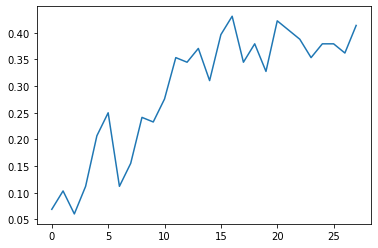

28

In [10]:
y_pred = model.predict(x_test)
accuracies = model.validation_scores_
mt.plot(accuracies)
mt.show()
len(accuracies)

In [11]:
model.predict([x_test[0,:]])

array(['disgust_male'], dtype='<U16')

In [12]:
#DataFlair - Calculate the accuracy of our model
accuracy=accuracy_score(y_true=y_test, y_pred=y_pred)

#DataFlair - Print the accuracy
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 32.29%


In [13]:

# Save to file in the current working directory
joblib_file = "emotion_recognition.pkl"
joblib.dump(model, joblib_file)

['emotion_recognition.pkl']

In [14]:
model1 = joblib.load("emotion_recognition.pkl")

In [15]:
x_test[1,1:]

array([ 5.41933784e+01, -3.28417826e+00,  1.62094021e+01,  2.90516758e+00,
        9.21209216e-01, -7.01507092e+00, -7.92186499e+00, -5.68913794e+00,
       -2.17657781e+00,  4.66300786e-01, -8.62386990e+00,  1.01611364e+00,
        3.25834662e-01, -4.57404041e+00,  2.29363585e+00, -3.82268143e+00,
       -9.92140546e-02,  1.34911644e+00, -1.06335498e-01, -4.29361820e+00,
       -3.05556035e+00, -3.75522852e+00, -1.60885048e+00, -5.04771137e+00,
        3.29403311e-01, -3.00619173e+00,  2.67380404e+00, -1.57976294e+00,
        1.12911439e+00,  2.46006727e+00, -1.14811575e+00,  5.25287747e-01,
        2.37976122e+00, -8.78250301e-01,  3.83871794e+00,  1.23779678e+00,
        1.93641114e+00,  8.49628448e-03,  3.18335295e+00,  6.09191298e-01,
        6.48806214e-01,  6.70116663e-01,  6.58928871e-01,  6.14321828e-01,
        6.49509132e-01,  6.45783544e-01,  6.87926888e-01,  7.34895706e-01,
        7.00872123e-01,  6.51120543e-01,  6.10151589e-01,  2.41065514e-04,
        3.57976896e-05,  

In [16]:
model1.predict(x_test)

array(['disgust_male', 'disgust_male', 'surprised_female',
       'disgust_female', 'happy_male', 'calm_male', 'sad_female',
       'disgust_male', 'happy_male', 'happy_female', 'disgust_male',
       'disgust_female', 'disgust_male', 'fearful_female', 'disgust_male',
       'disgust_male', 'disgust_female', 'happy_male', 'sad_female',
       'disgust_male', 'neutral_female', 'disgust_female', 'calm_male',
       'disgust_male', 'happy_male', 'calm_male', 'sad_female',
       'fearful_male', 'calm_female', 'calm_male', 'happy_female',
       'happy_male', 'calm_female', 'happy_female', 'disgust_male',
       'disgust_female', 'sad_female', 'happy_male', 'disgust_female',
       'surprised_female', 'disgust_female', 'angry_female',
       'calm_female', 'fearful_female', 'angry_female', 'disgust_male',
       'happy_male', 'fearful_female', 'sad_female', 'happy_male',
       'disgust_male', 'disgust_female', 'disgust_male', 'calm_female',
       'disgust_male', 'disgust_female', 'calm_m

In [17]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 1.9 MB/s eta 0:00:0000:0100:010m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 KB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 447.0/447.0 KB 11.2 MB/s eta 0:00:0000:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 5.5 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 KB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.9/212.9 KB 3.5 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.3/63.3 KB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.6/80.6 KB 1.5 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.9/349.9 KB 5.6 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.0/50.0 KB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.2/58.2 KB 1.8 MB

  Created wheel for ffmpy: filename=ffmpy-0.3.0-py3-none-any.whl size=4709 sha256=6222d4ff75e89ba2807ee08e3f205f5f159bf94809ab1a2a15ff349a7f661697
  Stored in directory: /Users/michaelmathew/Library/Caches/pip/wheels/91/e2/96/f676aa08bfd789328c6576cd0f1fde4a3d686703bb0c247697
  Created wheel for python-multipart: filename=python_multipart-0.0.5-py3-none-any.whl size=31670 sha256=5a0a98467396703ac653d40ca9c06eb7ab51e5df5e2eac6912ea2712840b1c11
  Stored in directory: /Users/michaelmathew/Library/Caches/pip/wheels/fe/04/d1/a10661cc45f03c3cecda50deb2d2c22f57b4e84a75b2a5987e
Successfully built ffmpy python-multipart
  Attempting uninstall: anyio
    Found existing installation: anyio 2.2.0
    Uninstalling anyio-2.2.0:
      Successfully uninstalled anyio-2.2.0
You should consider upgrading via the '/Users/michaelmathew/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


In [18]:
audio='audio_speech_actors_01-24/Actor_24/03-01-03-01-02-02-24.wav'
data,sample_rate = librosa.load(audio)
result=np.array([])
mfccs=np.mean(librosa.feature.mfcc(y=data, sr=sample_rate, n_mfcc=40).T, axis=0)
result=np.hstack((result, mfccs))
stft=np.abs(librosa.stft(data))
chroma=np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
result=np.hstack((result, chroma))
mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
result=np.hstack((result, mel))
result=result.reshape(1,-1)
prediction=model1.predict(result)
print (prediction[0])

surprised_female


/var/folders/7h/3y0jb5yx0g399b2y_qtq_db80000gn/T/ipykernel_26966/1080200470.py:9: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 4.4829296e-05 4.9405139e-06
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)


In [20]:

filename = 'finalized_model.sav'
pickle.dump(model1, open(filename, 'wb'))